In [253]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg
import os
from itertools import combinations
import random

In [254]:
os.environ["OUTDATED_RAISE_EXCEPTION"] = str(1)

In [255]:
# Настройки для графиков
sns.set(
    font_scale=1,
    style="whitegrid",
    rc={'figure.figsize': (20, 7)}
)
sns.set_palette(palette='Set2')

In [256]:
# считываем данные
ut = pd.read_csv(
    'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/4XXIME4osGrMRA', sep=';')

uc1 = pd.read_csv(
    'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/yJFydMNNGkEKfg', sep=';')

uc2 = pd.read_csv(
    'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/br6KkQupzzTGoQ', sep=';')

tt = pd.read_csv(
    'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/gvCWpZ55ODzs2g', sep=';')

tc1 = pd.read_csv(
    'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/VY5W0keMX5TZBQ', sep=';')

tc2 = pd.read_csv(
    'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/th5GL0mGOc-qzg', sep=';')

Смотрим, как считались данные

In [257]:
ut.sample(5)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
109,891083268,24,952,NaN,United States of America,"1,4",1,21,30,21,NaN,NaN,0
2493,891761883,44,435,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15",1,30,44,39,NaN,NaN,0
1265,892132824,42,57,NaN,Germany,"1,2,3,5,6,7",1,39,45,70,NaN,NaN,0
4192,891257379,28,428,NaN,United States of America,"1,2,3,4,5,7",1,25,31,14,NaN,NaN,0
2504,891148146,34,833,NaN,Chile,"1,2,4",1,17,60,6,NaN,NaN,0


In [258]:
uc1.sample(5)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
2809,891089892,49,0,NaN,Spain,"1,2,3",1,46,52,0,NaN,NaN,0
3901,892136193,25,235,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18",1,22,50,17,NaN,NaN,0
2337,892021146,22,200,NaN,United States of America,1,1,19,25,5,NaN,NaN,0
1951,891859131,26,0,NaN,Germany,NaN,1,23,29,0,NaN,NaN,0
1915,892379373,27,66,NaN,Israel,NaN,1,24,30,15,NaN,NaN,0


In [259]:
uc2.sample(5)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
2090,891224154,22,0,NaN,United States of America,NaN,1,19,30,0,NaN,NaN,0
2044,892251639,27,0,NaN,United States of America,NaN,1,24,30,5,NaN,NaN,0
3487,892093965,52,17,NaN,Germany,NaN,1,49,55,58,NaN,NaN,0
3816,892439319,24,718,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11",1,21,27,64,NaN,NaN,0
3581,891509781,42,0,NaN,France,NaN,1,39,45,0,NaN,NaN,0


Проверим на наличие дубликатов

In [260]:
ut.duplicated().sum()

0

In [261]:
uc1.duplicated().sum()

0

In [262]:
uc2.duplicated().sum()

0

Сравним типы данных в датафреймах users, чтобы понять, можно ли их мерджить и конкатенировать. Заодно проверим пропуски в данных.

In [263]:
ut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4308 non-null   int64  
 1   age               4308 non-null   int64  
 2   attraction_coeff  4308 non-null   int64  
 3   coins             49 non-null     float64
 4   country           4308 non-null   object 
 5   visit_days        2978 non-null   object 
 6   gender            4308 non-null   int64  
 7   age_filter_start  4308 non-null   int64  
 8   age_filter_end    4308 non-null   int64  
 9   views_count       4308 non-null   int64  
 10  was_premium       408 non-null    float64
 11  is_premium        157 non-null    float64
 12  total_revenue     4308 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 437.7+ KB


In [264]:
uc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4340 non-null   int64  
 1   age               4340 non-null   int64  
 2   attraction_coeff  4340 non-null   int64  
 3   coins             60 non-null     float64
 4   country           4340 non-null   object 
 5   visit_days        3016 non-null   object 
 6   gender            4340 non-null   int64  
 7   age_filter_start  4340 non-null   int64  
 8   age_filter_end    4340 non-null   int64  
 9   views_count       4340 non-null   int64  
 10  was_premium       436 non-null    float64
 11  is_premium        192 non-null    float64
 12  total_revenue     4340 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 440.9+ KB


In [265]:
uc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264 entries, 0 to 4263
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4264 non-null   int64  
 1   age               4264 non-null   int64  
 2   attraction_coeff  4264 non-null   int64  
 3   coins             61 non-null     float64
 4   country           4264 non-null   object 
 5   visit_days        2900 non-null   object 
 6   gender            4264 non-null   int64  
 7   age_filter_start  4264 non-null   int64  
 8   age_filter_end    4264 non-null   int64  
 9   views_count       4264 non-null   int64  
 10  was_premium       411 non-null    float64
 11  is_premium        191 non-null    float64
 12  total_revenue     4264 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 433.2+ KB


В датафреймах users типы данных совпадают, можно было бы заменить float на int, но сделаем это позже если потребуется

Проверим, все ли uid являются уникальными

In [266]:
ut.uid.nunique()

4308

In [267]:
uc1.uid.nunique()

4340

In [268]:
uc2.uid.nunique()

4264

Да, все uid уникальны

In [269]:
tt.sample(5)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
217,891882681,Belgium,2017-10-25 17:25:00,2017-04-11 10:26:00,7813,146,empty_likes,coins
200,891589239,Italy,2017-10-31 14:16:00,2017-02-11 11:45:00,6305,19,autorefill,coins
213,892065108,France,2017-10-21 20:40:00,2017-10-11 15:24:00,7111,147,popular_users_chat,premium_no_trial
23,891861048,Canada,2017-10-26 02:55:00,2017-10-28 16:30:00,3549,19,none,coins
45,892037613,United States of America,2017-10-22 11:48:00,2017-10-25 14:10:00,4602,146,empty_likes,coins


In [270]:
tc1.sample(5)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
759,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
925,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
467,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
213,891662499.0,United Kingdom (Great Britain),2017-10-30 00:57:00,2017-10-11 19:42:00,3783.0,67.0,fans,other_type
647,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN


In [271]:
tc2.sample(5)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
122,892225545,Argentina,2017-10-18 09:55:00,2017-10-25 12:18:00,10699,147,trial_vip_popup,trial_premium
280,892318245,United Kingdom (Great Britain),2017-10-16 11:26:00,2017-10-19 06:33:00,6292,147,left_sidebar_menu,premium_no_trial
75,891722802,United States of America,2017-10-29 02:08:00,2017-04-11 17:39:00,1261,19,menu,coins
203,891365604,United Kingdom (Great Britain),2017-05-11 03:50:00,2017-05-11 03:54:00,4537,147,send_message,premium_no_trial
131,892128138,Argentina,2017-10-20 14:49:00,2017-10-28 22:49:00,6305,19,empty_likes,coins


Сравним типы данных в датафреймах transactions, чтобы понять, можно ли их мерджить и конкатенировать. Заодно проверим пропуски в данных.

In [272]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uid           273 non-null    int64 
 1   country       273 non-null    object
 2   joined_at     273 non-null    object
 3   paid_at       273 non-null    object
 4   revenue       273 non-null    int64 
 5   payment_id    273 non-null    int64 
 6   from_page     273 non-null    object
 7   product_type  273 non-null    object
dtypes: int64(3), object(5)
memory usage: 17.2+ KB


In [273]:
tc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uid           377 non-null    float64
 1   country       377 non-null    object 
 2   joined_at     1007 non-null   object 
 3   paid_at       1007 non-null   object 
 4   revenue       377 non-null    float64
 5   payment_id    377 non-null    float64
 6   from_page     377 non-null    object 
 7   product_type  377 non-null    object 
dtypes: float64(3), object(5)
memory usage: 63.1+ KB


In [274]:
tc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uid           328 non-null    int64 
 1   country       328 non-null    object
 2   joined_at     328 non-null    object
 3   paid_at       328 non-null    object
 4   revenue       328 non-null    int64 
 5   payment_id    328 non-null    int64 
 6   from_page     328 non-null    object
 7   product_type  328 non-null    object
dtypes: int64(3), object(5)
memory usage: 20.6+ KB


In [275]:
# Удалим пустые строки в таблице tc1
tc1 = tc1.dropna()
# Приводим колонки с датами к формату даты, в таблице tc1 поменяем тип данных float на int
tt.joined_at = pd.to_datetime(tt.joined_at)
tc1.joined_at = pd.to_datetime(tc1.joined_at)
tc2.joined_at = pd.to_datetime(tc2.joined_at)
tt.paid_at = pd.to_datetime(tt.paid_at)
tc1.paid_at = pd.to_datetime(tc1.paid_at)
tc2.paid_at = pd.to_datetime(tc2.paid_at)
# Поменяем тип данных, чтобы он соответствовал другим таблицам
tc1 = tc1
for col in ['uid', 'revenue', 'payment_id']:
    tc1[col] = tc1[col].astype('int')

Проверим на наличие дубликатов

In [276]:
tt.duplicated().sum()

7

In [277]:
tt.loc[tt.duplicated(keep=False)].sort_values('uid')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
15,891508155,Latvia,2017-02-11 09:46:00,2017-03-11 22:06:00,936,19,empty_likes,coins
158,891508155,Latvia,2017-02-11 09:46:00,2017-03-11 22:06:00,936,19,empty_likes,coins
80,892050108,Israel,2017-10-22 03:02:00,2017-10-23 02:53:00,1261,19,empty_likes,coins
96,892050108,Israel,2017-10-22 03:02:00,2017-10-23 02:53:00,1261,19,empty_likes,coins
179,892202526,United States of America,2017-10-18 20:34:00,2017-10-20 19:54:00,897,19,menu,coins
205,892202526,United States of America,2017-10-18 20:34:00,2017-10-20 19:54:00,897,19,menu,coins
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type
3,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type
17,892236423,United States of America,2017-10-18 01:09:00,2017-10-22 22:08:00,1261,19,empty_likes,coins
55,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type


In [278]:
#  Создаем массив дублированных id для дальнейших проверок
duplicates = tt.loc[tt.duplicated(keep=False)].uid.unique()

In [279]:
tc1.duplicated().sum()

21

In [280]:
tc1.loc[tc1.duplicated(keep=False)].sort_values('uid')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
341,891252072,Argentina,2017-06-11 19:56:00,2017-08-11 18:18:00,1261,19,empty_likes,coins
344,891252072,Argentina,2017-06-11 19:56:00,2017-08-11 18:18:00,1261,19,empty_likes,coins
301,891320916,Israel,2017-05-11 19:36:00,2017-07-11 20:04:00,3783,67,empty_likes,other_type
227,891320916,Israel,2017-05-11 19:36:00,2017-07-11 20:04:00,3783,67,empty_likes,other_type
22,891365490,United States of America,2017-05-11 03:55:00,2017-06-11 00:28:00,1261,19,empty_likes,coins
233,891365490,United States of America,2017-05-11 03:55:00,2017-06-11 00:28:00,1261,19,empty_likes,coins
93,891367521,Italy,2017-05-11 02:37:00,2017-10-11 01:52:00,1469,19,sympathy,other_type
31,891367521,Italy,2017-05-11 02:37:00,2017-10-11 01:52:00,1469,19,sympathy,other_type
308,891367521,Italy,2017-05-11 02:37:00,2017-06-11 17:43:00,1456,127,sympathy,other_type
298,891367521,Italy,2017-05-11 02:37:00,2017-06-11 17:43:00,1456,127,sympathy,other_type


In [281]:
duplicates = np.append(
    duplicates, tc1.loc[tc1.duplicated(keep=False)].uid.unique())

In [282]:
tc2.duplicated().sum()

5

In [283]:
tc2.loc[tc2.duplicated(keep=False)].sort_values('uid')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
6,891862596,Italy,2017-10-26 01:40:00,2017-10-30 09:01:00,1261,19,empty_likes,coins
86,891862596,Italy,2017-10-26 01:40:00,2017-10-30 09:01:00,1261,19,empty_likes,coins
229,892009254,Italy,2017-10-22 22:57:00,2017-10-23 00:06:00,2353,67,empty_likes,other_type
241,892009254,Italy,2017-10-22 22:57:00,2017-10-23 00:06:00,2353,67,empty_likes,other_type
285,892045743,Israel,2017-10-22 07:04:00,2017-10-23 20:17:00,1261,19,empty_likes,coins
321,892045743,Israel,2017-10-22 07:04:00,2017-10-23 20:17:00,1261,19,empty_likes,coins
221,892062660,United States of America,2017-10-21 21:28:00,2017-10-31 00:53:00,1261,19,empty_likes,coins
288,892062660,United States of America,2017-10-21 21:28:00,2017-10-31 00:53:00,1261,19,empty_likes,coins
146,892064328,United States of America,2017-10-21 20:54:00,2017-10-22 01:30:00,6305,19,empty_likes,coins
235,892064328,United States of America,2017-10-21 20:54:00,2017-10-22 01:30:00,6305,19,empty_likes,coins


In [284]:
duplicates = np.append(
    duplicates, tc2.loc[tc2.duplicated(keep=False)].uid.unique())

In [285]:
duplicates

array([892236423, 891508155, 892339626, 892050108, 892202526, 892207959,
       892333905, 891365490, 891367521, 891721851, 892102893, 891452706,
       891739737, 891320916, 891252072, 891862596, 892064328, 892062660,
       892009254, 892045743])

In [286]:
# Удалим дубликаты
tt = tt.drop_duplicates()
tc1 = tc1.drop_duplicates()
tc2 = tc2.drop_duplicates()

In [287]:
# Сбросим индексы, чтобы они были по порядку
tt = tt.reset_index().drop(columns=['index'])
tc1 = tc1.reset_index().drop(columns=['index'])
tc2 = tc2.reset_index().drop(columns=['index'])

Проверяем, все ли хорошо поменялось

In [288]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           266 non-null    int64         
 1   country       266 non-null    object        
 2   joined_at     266 non-null    datetime64[ns]
 3   paid_at       266 non-null    datetime64[ns]
 4   revenue       266 non-null    int64         
 5   payment_id    266 non-null    int64         
 6   from_page     266 non-null    object        
 7   product_type  266 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 16.8+ KB


In [289]:
tc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           356 non-null    int64         
 1   country       356 non-null    object        
 2   joined_at     356 non-null    datetime64[ns]
 3   paid_at       356 non-null    datetime64[ns]
 4   revenue       356 non-null    int64         
 5   payment_id    356 non-null    int64         
 6   from_page     356 non-null    object        
 7   product_type  356 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 22.4+ KB


In [290]:
tc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           323 non-null    int64         
 1   country       323 non-null    object        
 2   joined_at     323 non-null    datetime64[ns]
 3   paid_at       323 non-null    datetime64[ns]
 4   revenue       323 non-null    int64         
 5   payment_id    323 non-null    int64         
 6   from_page     323 non-null    object        
 7   product_type  323 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 20.3+ KB


Более подробно посмотрим описательные статистики в ходе дальнейшего анализа

# Сформулируем продуктовую гипотезу, которую мы будем проверять в этом проекте

Если изменить стоимость пермиум подписки, то ARPU увеличится

Почему ARPU? Когда мы изменяем стоимость подписки, возможен сценарий, при котором конверсия в покупку увеличивается, а средний чек снижается (или наоборот). То есть, разные метрики могут изменяться в противоположных направлениях. Чтобы получить общий вывод, нам нужна метрика, которая объединяет и агрегирует оба этих изменения. В нашем случае это ARPU. Однако для полноты картины мы также проанализируем CR и средний чек. Помимо этих трех метрик, связанных с доходом, мы рассмотрим прокси-метрики, отражающие лояльность пользователей, такие как retention на 7, 14, 30 и 60 дни.
Почему важно анализировать retention? Мы предполагаем, что изменение цены подписки не окажет значительного влияния на retention, так как этот показатель больше зависит от других аспектов приложения. Тем не менее, нельзя полностью исключить возможность, что после акции CR вырастет, но retention снизится, что может негативно сказаться на долгосрочных доходах. В случае повышения цены подписки CR может уменьшиться, но если retention вырастет, это может привести к увеличению LTV и доходов в перспективе.

# План исследования

1. Проверка формирования групп: 1.1. Проверим, чтобы группы не пересекались, то есть чтобы один и тот же пользователь не входил в разные группы. Если такие пользователи найдутся, удалим их из выборки. 1.2. Убедимся, что группы не отличаются по ключевым показателям, таким как возрастной и половой состав, коэффициент привлекательности, период наблюдений, страны, каналы привлечения пользователей и платежные системы, через которые производилась оплата премиум-подписки. Эти показатели в идеале не должны различаться, чтобы избежать влияния сторонних факторов на конверсию и другие исследуемые показатели. Если будут выявлены различия, потребуется дополнительный анализ для того, чтобы понять, что именно повлияло на показатель: наша акция или другие факторы, например, страна. 
2. Смотрим есть ли различия между контрольными группами по целем метрикам, если контрольные группы не будут различаться - оставим одну случайно выбранную контрольную группу. Оцениваем ARPU, конверсию в покупку премиум-подписки, средний чек и retention. 
3. Проводим A/Б тесты. Оцениваем ARPU, конверсию в покупку премиум-подписки, средний чек и retention на 7, 14, 30 и 60 дни.
4. Вывод о результате эксперимента.

# 1. Проверяем как сформированы группы

## 1.1 Как соотносятся id в разных группах

### Cовпадения по uid между users

In [291]:
uids_ut = ut.uid.unique()
uids_uc1 = uc1.uid.unique()
uids_uc2 = uc2.uid.unique()

In [292]:
list(set(uids_ut) & set(uids_uc1))

[]

In [293]:
list(set(uids_ut) & set(uids_uc2))

[]

In [294]:
list(set(uids_uc1) & set(uids_uc2))

[]

### Cовпадения по uid между transactions

Проверяем, чтобы не было uid, которые входят в несколько таблиц users

In [295]:
uids_tt = tt.uid.unique()
uids_tc1 = tc1.uid.unique()
uids_tc2 = tc2.uid.unique()

In [296]:
list(set(uids_tt) & set(uids_tc1))

[]

In [297]:
list(set(uids_tt) & set(uids_tc2))

[]

In [298]:
list(set(uids_tt) & set(uids_tc2))

[]

### Совпадения между users и transactions

Проверим, чтобы в таблицах transactions были только те пользователи, uid которых есть в соответствующей таблице users

In [299]:
set(uids_tt).issubset(set(uids_ut))

True

In [300]:
set(uids_tc1).issubset(set(uids_uc1))

True

In [301]:
set(uids_tc2).issubset(set(uids_uc2))

True

## Вывод по блоку 1.1:

В каждой таблице users и transactions uid уникальны. В таблицу transactions входят только те uid, которые есть в соответствующей таблице users.

## 1.2. Оцениваем, различаются ли группы по тем показателям, по которым в теории они различаться не должны

### Даты

In [302]:
tt[['joined_at', 'paid_at']].describe()

,joined_at,paid_at
count,266,266
mean,2017-09-05 04:54:23.909774080,2017-09-05 08:19:27.969924864
min,2017-01-11 03:07:00,2017-01-11 04:37:00
25%,2017-08-11 03:54:00,2017-07-11 20:57:45
50%,2017-10-18 20:34:00,2017-10-22 14:40:30
75%,2017-10-23 13:08:00,2017-10-29 07:48:00
max,2017-10-31 23:40:00,2017-12-11 22:06:00


In [303]:
tc1[['joined_at', 'paid_at']].describe()

,joined_at,paid_at
count,356,356
mean,2017-08-21 21:52:31.685393152,2017-09-03 23:56:06.067415808
min,2015-01-19 11:49:00,2016-12-14 16:16:00
25%,2017-06-11 17:41:45,2017-07-11 11:56:15
50%,2017-10-17 03:36:00,2017-10-17 10:34:30
75%,2017-10-23 12:14:30,2017-10-28 05:51:45
max,2017-10-31 22:17:00,2017-12-11 21:57:00


In [304]:
tc2[['joined_at', 'paid_at']].describe()

,joined_at,paid_at
count,323,323
mean,2017-09-18 19:07:11.702786560,2017-09-03 21:10:33.250774016
min,2017-01-11 08:36:00,2017-01-11 05:34:00
25%,2017-10-11 11:45:00,2017-07-11 11:45:00
50%,2017-10-20 14:49:00,2017-10-21 20:12:00
75%,2017-10-26 01:52:30,2017-10-28 10:42:30
max,2017-10-31 17:43:00,2017-12-11 23:28:00


Видно что в тесте и в контроле_2 данные собраны за одно и тоже время: с 11 января по 31 октября 2017 года. А в контроле_1 сбор данных начался 19 января 2015. Это не очень корректно, проверим, сколько данных было собрано до 2017-01-11

In [305]:
tc1.query('joined_at < "2017-01-11"')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
64,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:30:00,26,0,refund_VP,other_type
98,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:35:00,637,0,refung_AP,other_type
215,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 16:16:00,143,0,refund_WP,other_type


In [306]:
old_users = tc1.query('joined_at < "2017-01-11"').uid.unique()
old_users

array([960936960])

Посмотрим, соверщали ли "старый" пользователь какие-то действия после 2015

In [307]:
tc1.query('uid.isin(@old_users)')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
64,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:30:00,26,0,refund_VP,other_type
98,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:35:00,637,0,refung_AP,other_type
215,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 16:16:00,143,0,refund_WP,other_type


Так как старый пользователь всего один, а транзакций у него три, и он проявлял активность только в 2015, то удалим эти строчки из датасета tc1, а также удалим пользователя из uc1

In [308]:
tc1 = tc1.query('uid not in @old_users')
uc1 = uc1.query('uid not in @old_users')

In [309]:
tc1.shape

(353, 8)

In [310]:
uc1.shape

(4339, 13)

In [311]:
tc1[['joined_at', 'paid_at']].describe()

,joined_at,paid_at
count,353,353
mean,2017-08-29 22:42:31.784702464,2017-09-06 05:38:09.688385280
min,2017-01-11 01:06:00,2017-01-11 02:56:00
25%,2017-06-11 19:19:00,2017-07-11 12:47:00
50%,2017-10-17 06:45:00,2017-10-17 19:05:00
75%,2017-10-23 14:16:00,2017-10-28 09:03:00
max,2017-10-31 22:17:00,2017-12-11 21:57:00


### Создание объединенных датафреймов и проверка транзакций

Создадим два общих датафрема users и transactions, для чего конкатенируем три таблицы, предварительно создав в каждой колонку group

In [312]:
ut['group'] = 'test'
uc1['group'] = 'control_1'
uc2['group'] = 'control_2'
users = pd.concat([ut, uc1, uc2], ignore_index=True)
users.sample(5)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group
2984,891953853,31,1000,NaN,Argentina,"1,2,3,4,5,7,8,9,10,11,13,14,15,16,17,18,20,21",1,18,35,6,NaN,NaN,0,test
4509,892359597,26,333,NaN,Switzerland,"1,2,3",1,23,29,3,NaN,NaN,0,control_1
3909,891442335,21,517,NaN,United States of America,NaN,0,18,24,112,NaN,NaN,0,test
5478,891529185,59,0,NaN,France,"1,2,3,5,6,8,9,10,11,12,14",1,50,62,3,NaN,NaN,0,control_1
9981,891429192,25,200,NaN,Italy,NaN,1,22,28,5,NaN,NaN,0,control_2


In [313]:
tt['group'] = 'test'
tc1['group'] = 'control_1'
tc2['group'] = 'control_2'
transactions = pd.concat([tt, tc1, tc2], ignore_index=True)
transactions.sample(5)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
56,892339626,United States of America,2017-10-15 23:21:00,2017-10-20 18:14:00,754,19,empty_likes,coins,test
47,891640689,France,2017-10-30 13:47:00,2017-06-11 17:31:00,16432,147,none,trial_premium,test
351,891881343,United States of America,2017-10-25 17:58:00,2017-01-11 21:08:00,12727,147,dating,trial_premium,control_1
577,891983052,France,2017-10-23 14:36:00,2017-10-23 15:01:00,6396,147,autoreply_message,premium_no_trial,control_1
520,891270606,Argentina,2017-06-11 14:03:00,2017-11-13 16:47:00,10556,147,trial_vip_popup,trial_premium,control_1


Дополнительно поработаем с датафреймом transactions. Поймем, были ли пользователи, у которых дата покупки раньше даты регистрации, если такие есть - удалим. Также попробуем найти какие-то законормести в значениях в графе revenue чтобы понять месячную стоимость подписки, и сколько месяцев пользователь за нее платил.

In [314]:
# Транзакции, у которых оплата раньше регистрации
transactions.query('paid_at < joined_at').sample(10)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
324,891693753,Turkey,2017-10-29 15:24:00,2017-04-11 20:45:00,5304,19,empty_likes,coins,control_1
623,891592941,Switzerland,2017-10-31 12:40:00,2017-03-11 16:25:00,6292,147,promo_09,premium_no_trial,control_2
470,891662499,United Kingdom (Great Britain),2017-10-30 00:57:00,2017-10-11 19:42:00,3783,67,fans,other_type,control_1
98,891600819,United States of America,2017-10-31 08:41:00,2017-05-11 19:10:00,4602,146,empty_likes,coins,test
280,892277877,United States of America,2017-10-17 03:36:00,2017-10-11 15:23:00,897,19,empty_likes,coins,control_1
446,891707061,Argentina,2017-10-29 10:54:00,2017-10-11 13:14:00,1261,19,empty_likes,coins,control_1
598,891972303,United Arab Emirates,2017-10-23 19:06:00,2017-05-11 18:18:00,4914,147,promo_09,premium_no_trial,control_1
55,892261437,Italy,2017-10-17 14:22:00,2017-06-11 11:51:00,1898,68,none,premium_no_trial,test
929,892075512,United States of America,2017-10-21 16:58:00,2017-08-11 12:18:00,9958,147,trial_vip_popup,trial_premium,control_2
816,891728544,United States of America,2017-10-28 23:18:00,2017-05-11 01:18:00,12727,147,trial_vip_popup,trial_premium,control_2


In [315]:
# Сколько бракованных транзакций
transactions.query('paid_at < joined_at').shape[0]

162

In [316]:
# Скольких пользователей затронул брак дат транзакций
transactions.query('paid_at < joined_at').uid.nunique()

113

In [317]:
#Сколько всего транзакций
transactions.shape[0]

942

Транзакций, для которых дата покупки раньше даты регистрации 162 из 942, то есть около 17 процентов, то есть довольно много. Брак затронул 113 пользователей из разных выборок. Кроме того, кажется, что все "бракованные" транзакции совершены 11 числа (надо проверить), что может указывать на какой-то системный сбой при записи данных. Добавим колонку с разницой между покупкой и регистрацией в днях. Посмотрим, как распределены пользователи по дням.

In [318]:
# Правда ли, что все бракованные транзакции были совершены 11 числа
transactions.query('paid_at < joined_at').paid_at.dt.day.value_counts()

paid_at
11    162
Name: count, dtype: int64

In [319]:
# Были ли от 11 числа не бракованные транзакции?
transactions.query('paid_at > joined_at').paid_at.dt.day.value_counts()

paid_at
11    260
23     49
31     39
29     38
22     34
14     33
25     32
26     30
15     29
16     29
28     27
13     27
30     27
24     23
20     21
19     19
27     18
21     16
17     15
18     14
Name: count, dtype: int64

In [320]:
# Проверим, по каким числам производилась регистрация пользователей
transactions.joined_at.dt.day.value_counts()

joined_at
11    277
21     81
18     55
29     55
30     46
16     46
15     45
22     44
26     37
23     34
20     33
31     28
24     27
19     26
17     24
25     24
14     23
28     19
27     18
Name: count, dtype: int64

Промежуточный вывод: все транзакции, где дата покупки раньше даты регистрации были совершены 11 числа. 11 числа таже были совершены транзакции, где выполняется условие дата покупки > даты регистрации. Что интересно, не было покупок, совершенных до 11 числа каждого месяца. Регистрации пользователей до 11 числа каждого месяца также отсутствуют. Также обращает на себя тот факт, что транзакций, совершенных 11 числа в разы больше, чем остальных, в то время как мы ожидаем распределение транзакций по числам близкое к равномерному. То есть проблема того, что дата покупки < даты регистрации не едиственная проблема с датами в этом датасете!

In [321]:
# Проверим как обстоит дело с месяцами, все ли месяцы представлены. 
transactions.joined_at.dt.month.value_counts()

joined_at
10    678
5      73
6      52
2      24
3      22
8      21
7      21
1      17
4      17
9      17
Name: count, dtype: int64

In [322]:
transactions.paid_at.dt.month.value_counts()

paid_at
10    506
11     93
6      48
5      48
4      43
7      34
12     33
8      31
9      30
3      29
2      29
1      18
Name: count, dtype: int64

Месяцы представлены все, но распределение даже близко не равномерное, слишком много регистраций и оплат за 10 месяц. Немного подозрительно, но возможно давали рекламу и нагнали новых пользователей.

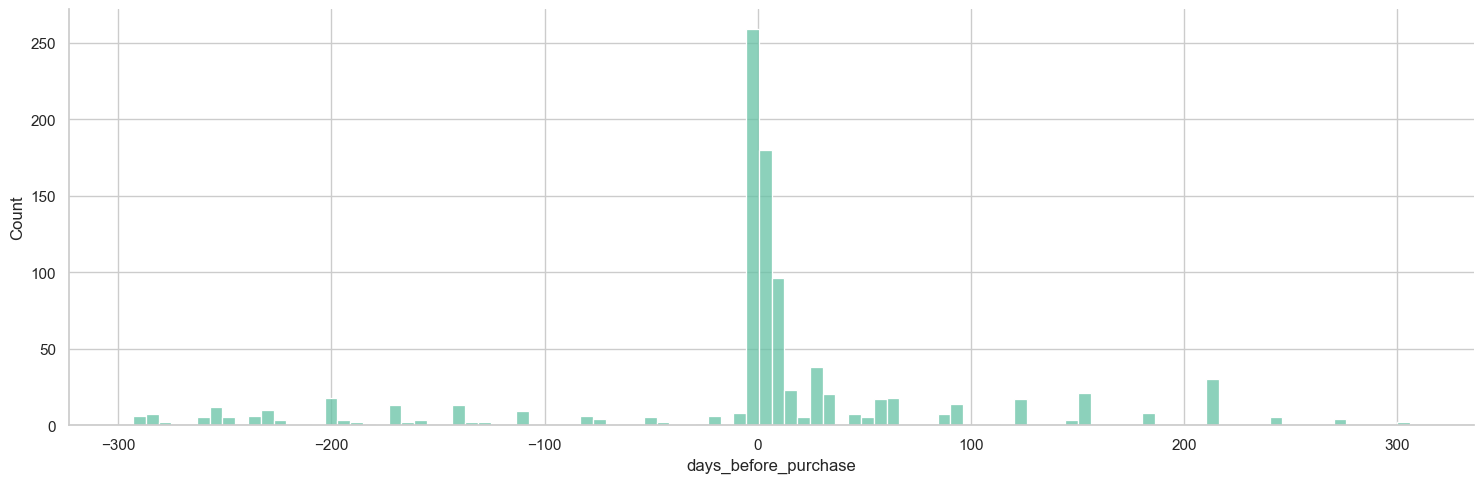

In [323]:
# Добавим колонку с разницей в днях между покупкой и регистрацией
transactions['days_before_purchase'] = (transactions.paid_at - transactions.joined_at).dt.days
# Построим распределение пользователей по этой дельте
sns.displot(transactions.days_before_purchase, bins=100, height=5, aspect=3)

Видно, что в основном пользователи оформляют подписку в первые два месяца от регистрации, но причина ошибок с датами оплаты яснее не стала.

Сделаем еще одну проверку корректности записи транзакций, посмотрим совпадает ли total_revenue из таблицs users c суммой покупок каждого пользователя, рассчитаного по таблицe transactions

In [324]:
# Считаем сумму покупок для каждого пользователя
revenue_per_user = transactions.groupby("uid", as_index=False).agg(
    rev_per_user=("revenue", "sum")
)
# Мерджим с таблицей users
all_revenue = users[["uid", "total_revenue"]].merge(
    revenue_per_user, how="left", on="uid"
)
# Заполняем пропуски нулями
all_revenue = all_revenue.fillna(0)
# Считаем разницу между total_revenue и revenue_per_user
all_revenue["diff"] = all_revenue.total_revenue - all_revenue.rev_per_user
all_revenue.sort_values("diff", ascending=False)

,uid,total_revenue,rev_per_user,diff
5734,892333905,486330,403104.0,83226.0
8175,892102893,25220,12610.0,12610.0
406,892236423,95823,86996.0,8827.0
6232,891452706,18902,12597.0,6305.0
8918,892064328,18902,12597.0,6305.0
...,...,...,...,...
4310,891670932,0,0.0,0.0
4311,891060786,0,0.0,0.0
4312,892006554,0,0.0,0.0
7677,892355163,0,30264.0,-30264.0


In [325]:
all_revenue.query('diff != 0').uid.count()

22

Оказывается что раздница есть, и существенная, но не для 111 пользователей, а только для 22. Только для двух человек сумма в столбце total_revenue меньше, чем сумма их покупок по таблицам transactions, то есть им как будто не учли какие-то транзакции в таблице users. Для остальных несовпадений сумма в графе total_revenue больше. Мы помним, что у нас были дубликаты в таблицах с транзакциями, возможно они привели к ошибкам в total_revenue. Проверим, совпадают ли uid пользователей, для которых total_revenue больше, чем сумма их покупок по таблицам transactions с uid из массива duplicates, куда мы записали дублированные uid

In [326]:
set(all_revenue.query('diff > 0').uid.unique()) - set(duplicates)

set()

Как видим, множество айдишников для которых total_revenue больше, чем сумма покупок по таблицам transactions в точности совпадает с со списком дублированных id, значит причина несостыковки - неучтенные дубликаты. Верные данные - сумма покупок из таблиц transactions

In [327]:
# Посмотрим на транзакции, которые недозаписались в total_revenue
uid_with_lost = all_revenue.query('diff < 0').uid.unique()
transactions.query('uid.isin(@uid_with_lost)')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group,days_before_purchase
63,892275462,France,2017-10-17 05:56:00,2017-02-11 18:24:00,44083,19,coins_popup,other_type,test,-248
151,892275462,France,2017-10-17 05:56:00,2017-10-20 17:00:00,14885,68,super_popup,other_type,test,3
550,892355163,United States of America,2017-10-15 18:45:00,2017-10-16 09:52:00,30264,68,super_popup,other_type,control_1,0


In [328]:
all_revenue.query('diff < 0')

,uid,total_revenue,rev_per_user,diff
2070,892275462,14885,58968.0,-44083.0
7677,892355163,0,30264.0,-30264.0


Как мы видим недоучлись 2 транзакции, одна от 11 февраля 2017, другая от 16 ноября 2017. У первой еще и дата покупки раньше даты регистрации, у второй в этом плане все нормально, обе в принципе относятся к нецелевым для нас транзакциям 'other_type'.

Промежуточный вывод: что касается несовпадения между total_revenue  у пользователя в users и суммой покупок в таблице transactions, основная причина - дубликаты, которые встречались в данных и были удалены нами на этапе eda. Также были две транзакции, неучтенные в total_revenue, и причину этого неучета мы не нашли. Правильными данными будем считать сумму покупок для каждого пользователя по таблице transactions, запишем эти данные в total_revenue 

In [329]:
# Добавляем колонку с правильной суммой покупок
ut = ut.merge(revenue_per_user[["uid", "rev_per_user"]], how="left", on="uid")
# удаляем колонку с неправильной суммой покупок
ut.drop(columns=["total_revenue"], inplace=True)
# Переименовываем колонку с правильной суммой
ut.rename(columns={"rev_per_user": "total_revenue"}, inplace=True)

uc1 = uc1.merge(revenue_per_user[["uid", "rev_per_user"]], how="left", on="uid")
uc1.drop(columns=["total_revenue"], inplace=True)
uc1.rename(columns={"rev_per_user": "total_revenue"}, inplace=True)

uc2 = uc2.merge(revenue_per_user[["uid", "rev_per_user"]], how="left", on="uid")
uc2.drop(columns=["total_revenue"], inplace=True)
uc2.rename(columns={"rev_per_user": "total_revenue"}, inplace=True)

users = users.merge(revenue_per_user[["uid", "rev_per_user"]], how="left", on="uid")
users.drop(columns=["total_revenue"], inplace=True)
users.rename(columns={"rev_per_user": "total_revenue"}, inplace=True)

Варианты работы с данными о датах:
1. Удаление всех транзакций, где дата покупки предшествует дате регистрации, а также удаление соответствующих пользователей. Плюсы этого подхода заключаются в том, что мы устраняем очевидный баг. Однако есть и минусы: мы искажаем общую картину конверсии (CR) и, соответственно, ARPU, так как удаляем только платящих пользователей. Это затрагивает значительную часть выборки (около 1/6). Кроме того, такое удаление не решает другие проблемы с датами (например, отсутствие транзакций и регистраций до 11-го числа каждого месяца), что означает, что доверие к оставшимся данным существенно не повышается.
2. Удаление всех транзакций, связанных с 11-м числом любого месяца. Это предполагается как маркер некорректности данных. Однако такой подход еще сильнее исказит показатели CR и ARPU, поскольку будет удалено больше транзакций. Также остается нерешенной проблема неопределенности истинной причины сбоя с датами, что снижает доверие к оставшимся данным, пусть и чуть меньше, чем в первом варианте.
3. Сохранение всех транзакций с признанием некорректности данных. В этом случае мы признаем, что даты зафиксированы неправильно (например, транзакции до 11-го числа могли либо не фиксироваться, либо ошибочно записываться на 11-е число). Поскольку мы не можем точно определить причину сбоя, расчет любых метрик, связанных с датами в датафреймах transactions, невозможен (например, оценка ARPU по месяцам). Однако мы можем анализировать другие метрики, не связанные с датами. К сожалению, мы также не сможем определить, на сколько месяцев каждый пользователь оформил подписку.

Третий вариант я считаю наиболее разумным, учитывая на какие метрики мы планируем опираться при принятии решения об успехе эксперимента. 

### Анализ платежных систем

В задании указано, что была изменена стоимость премиум-подписки при покупке через ДВЕ НОВЫЕ ПЛАТЕЖНЫЕ СИСТЕМЫ. Как таковой информации о платежной системе у нас нет, но возможно она зашита в payment_id. Изучим этот показатель

In [330]:
transactions.product_type.unique()

array(['trial_premium', 'other_type', 'premium_no_trial', 'coins'],
      dtype=object)

Нас интересует premium_no_trial, то есть покупка премиум подписки без пробной, так как в задании указано, что стоимость пробного периода не изменилась

In [331]:
tt.query('product_type == "premium_no_trial"').payment_id.value_counts()

payment_id
147    63
68     12
0       1
Name: count, dtype: int64

In [332]:
tc1.query('product_type == "premium_no_trial"').payment_id.value_counts()

payment_id
147    88
68     16
0       2
Name: count, dtype: int64

In [333]:
tc2.query('product_type == "premium_no_trial"').payment_id.value_counts()

payment_id
147    92
68     14
0       1
Name: count, dtype: int64

В целом для датасетов набор payment_id для покупки премиум подписки не отличается. Но в задании указано, что платежных систем должно быть две, поэтому удалим транзакции, сделанные с помощью нулевой платежной системы.

In [334]:
tt = tt.query('not (payment_id == 0 and product_type == "premium_no_trial")')
tc1 = tc1.query('not (payment_id == 0 and product_type == "premium_no_trial")')
tc2 = tc2.query('not (payment_id == 0 and product_type == "premium_no_trial")')
transactions = transactions.query(
    'not (payment_id == 0 and product_type == "premium_no_trial")')

In [335]:
transactions.query('product_type == "premium_no_trial"').payment_id.unique()

array([147,  68])

### География пользователей

Далее будем оценивать статистические различия по пяти параметрам: география (города), возраст, пол, коэффициент привлекательности, с какой страницы перешел на страницу оплаты. Всего пять сравнений, значит уровнь значимости будем умножать на 5 (поправка Бонферрони).

In [336]:
users.country.nunique()

72

In [337]:
ut.country.nunique()

51

In [338]:
uc1.country.nunique()

40

In [339]:
uc2.country.nunique()

45

Задание сформулировано следующим образом: "Был проведен A/B-тест, в рамках которого для новых пользователей ИЗ НЕКОТОРЫХ СТРАН была изменена стоимость премиум-подписки." При этом видно, что количество уникальных стран, откуда были набраны пользователи в разные группы, не совпадает. Возможны три сценария:
1. Корректная работа системы сплитования. Например, эксперимент был развернут в 100 странах, и пользователи из всех этих стран распределялись по группам. В результате в тестовой группе оказались пользователи из 51 страны, в контрольной 1 — из 40 стран, а в контрольной 2 — из 45 стран. Между группами могут быть как пересечения по странам, так и уникальные страны, но все они были выбраны из общего набора стран, участвовавших в эксперименте.
2. Сложная механика сплитования. В этом случае пользователи намеренно отбирались из разных стран, чтобы минимизировать эффект связанности выборок.
3. Ошибка в системе сплитования. Пользователи случайно оказались распределены по группам из разных стран.

Поскольку у нас нет возможности выяснить, какой из сценариев имеет место, будем исходить из самого неблагоприятного варианта — ошибки в системе сплитования. Поэтому рассмотрим, сколько пользователей и из каких стран потребуется исключить, чтобы выровнять группы.

In [340]:
countries = {
    "test": set(ut.country.unique()),
    "control_1": set(uc1.country.unique()),
    "control_2": set(uc2.country.unique()),
}

Наишем функцию compare_sets, которая на вход принимает словарь, в котором ключи - это названия групп, а значения - множества строковых переменных. Функция сравнивает множества переменных попарно и выводит несовпадающие элементы. Также функция возвращает множество всех несовпадений. Просмотрим несовпадающие элементы на случай, если города одни и те же, но просто написаны с ошибками

In [341]:
def compare_sets(group_dict):
    # Создаем множество, где будем хранить разницы
    all_differenses = set()
    specific_differensies = {}
    # Итерируем по всем возможным парам ключей
    for (group1, set1), (group2, set2) in combinations(group_dict.items(), 2):
        # Вычисляем разницу между множествами
        diff1 = set1 - set2
        diff2 = set2 - set1
        # Добавляем ее ко множеству различий
        all_differenses = all_differenses | diff1
        all_differenses = all_differenses | diff2
        specific_differensies[group1 + "_not_" + group2] = diff1
        specific_differensies[group2 + "_not_" + group1] = diff2
        # Выводим результат
        print(f"Разница между {group1} и {group2}:")
        print()
        print(f"Элементы в {group1} , которых нет в  {group2}: {diff1}")
        print()
        print(f"Элементы в {group2} , которых нет в {group1}: {diff2}")
        print()
        print()
    return all_differenses, specific_differensies

In [342]:
different_countries = compare_sets(countries)

Разница между test и control_1:

Элементы в test , которых нет в  control_1: {'Bolivia', 'Korea, Republic of', 'Tajikistan', 'Monaco', 'Guatemala', 'Singapore', 'Latvia', 'Iraq', 'Pakistan', 'Indonesia', 'Brazil', 'Gambia', 'Hungary', 'Islamic Republic of Iran', 'Uzbekistan', 'Azerbaijan', 'Uruguay', 'Morocco', 'Nepal', 'Georgia'}

Элементы в control_1 , которых нет в test: {'Armenia', 'Moldova, Republic of', 'Venezuela', 'Sweden', 'China', 'Jamaica', 'Panama', 'Qatar', 'Burkina Faso'}


Разница между test и control_2:

Элементы в test , которых нет в  control_2: {'Philippines', 'Bolivia', 'Korea, Republic of', 'Monaco', 'Guatemala', 'Singapore', 'Latvia', 'Iraq', 'Indonesia', 'Brazil', 'Gambia', 'Romania', 'Islamic Republic of Iran', 'Tunisia', 'Algeria', 'Uzbekistan', 'Egypt', 'Azerbaijan', 'Puerto Rico', 'Nepal'}

Элементы в control_2 , которых нет в test: {'Belarus', 'New Zealand', 'Somalia', 'Czech Republic', 'Lithuania', 'China', 'Kuwait', 'Mali', 'Qatar', 'Nicaragua', 'Uganda', 

In [343]:
# Всего несовпадающих стран
len(different_countries[0])

47

In [344]:
# Проверим, сколько пользователей мы потеряем, если выровняем все группы по странам
users.query('country in @different_countries[0]').uid.count()

84

Всего из трех групп потеряем 84 пользователя, кажется что это не очень много, учитывая, что в каждой группе по 4000 пользователей

In [345]:
# Множество uid из несовпадающих стран
ids_from_mm_countries = set(users.query(
    'country in @different_countries[0]').uid.unique())
# Во всех таблицах оставляем только пользователей из совпадающих стран
ut = ut.query('uid not in @ids_from_mm_countries')
uc1 = uc1.query('uid not in @ids_from_mm_countries')
uc2 = uc2.query('uid not in @ids_from_mm_countries')
tt = tt.query('uid not in @ids_from_mm_countries')
tc1 = tc1.query('uid not in @ids_from_mm_countries')
tc2 = tc2.query('uid not in @ids_from_mm_countries')
users = users.query('uid not in @ids_from_mm_countries')
transactions = transactions.query('uid not in @ids_from_mm_countries')

Посмотрим, сколько пользователей осталось в каждой группе

In [346]:
ut.shape[0]

4271

In [347]:
uc1.shape[0]

4318

In [348]:
uc2.shape[0]

4238

In [349]:
tt.shape[0]

261

In [350]:
tc1.shape[0]

351

In [351]:
tc2.shape[0]

318

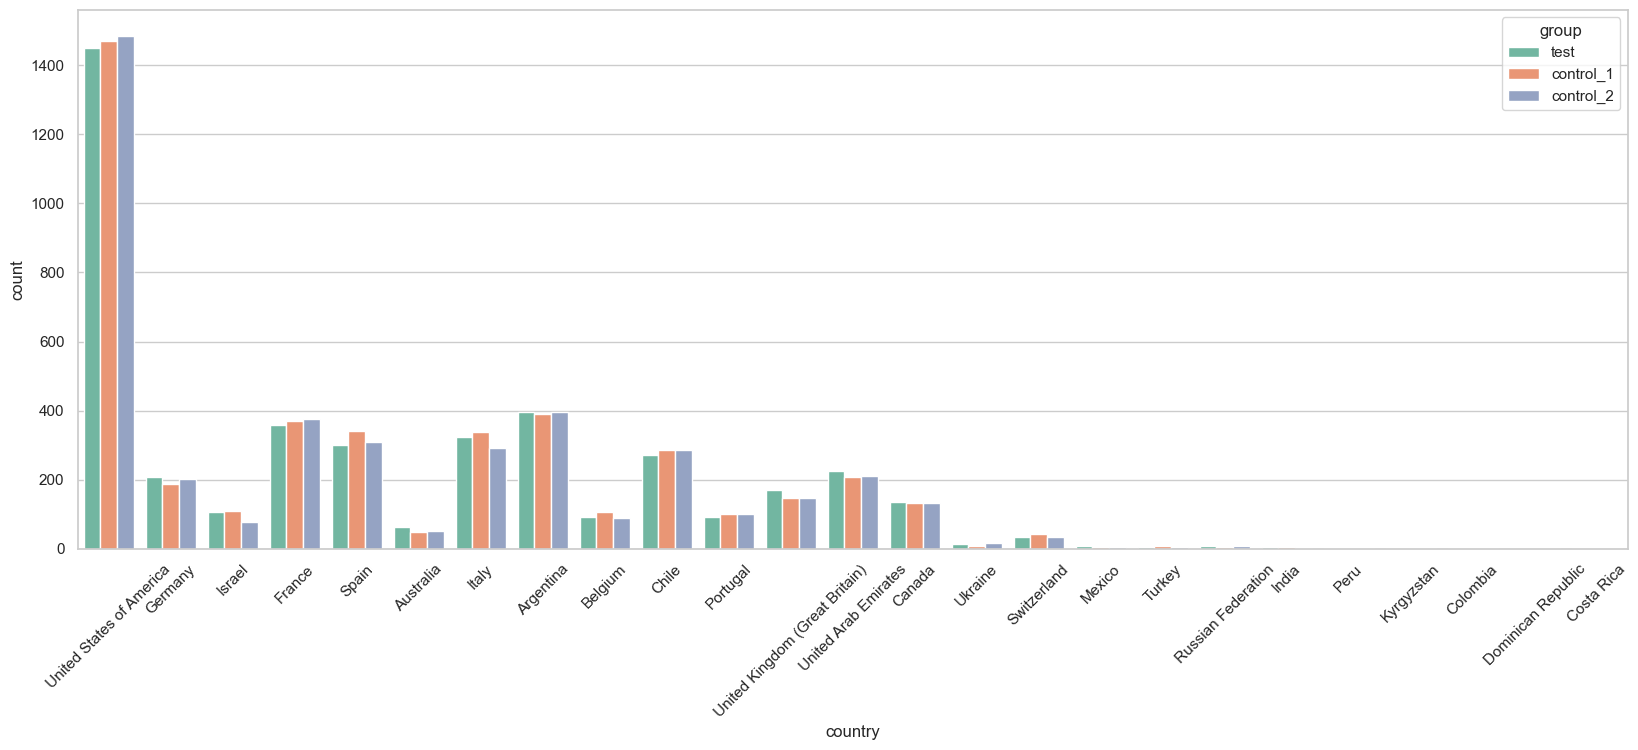

In [352]:
# Строим распределение пользователей по странам
sns.countplot(data=users, x='country', hue='group')
plt.xticks(rotation=45)
plt.show()

In [353]:
# Создаем таблицу сопряженности
crosstab_countris = pd.crosstab(users.group, users.country)
crosstab_countris

country,Argentina,Australia,Belgium,Canada,Chile,Colombia,Costa Rica,Dominican Republic,France,Germany,...,Peru,Portugal,Russian Federation,Spain,Switzerland,Turkey,Ukraine,United Arab Emirates,United Kingdom (Great Britain),United States of America
group,,,,,,,,,,,,,,,,,,,,,
control_1,389,50,108,134,287,1,1,2,370,188,...,1,100,5,342,42,8,8,207,146,1471
control_2,397,51,90,134,286,2,1,1,376,202,...,1,100,8,310,35,5,18,211,146,1486
test,396,62,92,137,272,1,1,1,359,209,...,1,91,7,301,35,5,15,226,169,1450


In [354]:
# Cколько совпадающих стран осталось? Было 72, несовпадающих 47
crosstab_countris.shape[1]

25

In [355]:
# Оцениваем есть ли различия в географии пользователей с помощью критерия хи-квадрат
# Нулевая гипотеза - география пользователей не различается
chi_countris = stats.chi2_contingency(crosstab_countris)
print(
    f"Критерий хи-квадрат равен {chi_countris[0].round(4)}, уровень значимости {chi_countris[1].round(4)}"
)
if chi_countris[1] * 5 < 0.05:  # корректировка множественных сравнений
    print(
        "Скорректированный уровень значимости меньше 0.05, значит мы отвергаем гипотезу о том, что география пользователей одинакова"
    )
else:
    print(
        "Скорректированный уровень значимости больше 0.05, значит делаем вывод, что география пользователей одинакова"
    )

Критерий хи-квадрат равен 32.1309, уровень значимости 0.9619
Скорректированный уровень значимости больше 0.05, значит делаем вывод, что география пользователей одинакова


### Возраст

In [356]:
ut.age.describe()

count    4271.000000
mean       31.903770
std        10.269227
min        16.000000
25%        25.000000
50%        30.000000
75%        38.000000
max        99.000000
Name: age, dtype: float64

In [357]:
uc1.age.describe()

count    4318.000000
mean       32.086383
std        10.265265
min        16.000000
25%        24.000000
50%        30.000000
75%        38.000000
max        99.000000
Name: age, dtype: float64

In [358]:
uc2.age.describe()

count    4238.000000
mean       32.041529
std        10.146888
min        16.000000
25%        25.000000
50%        30.000000
75%        38.000000
max        99.000000
Name: age, dtype: float64

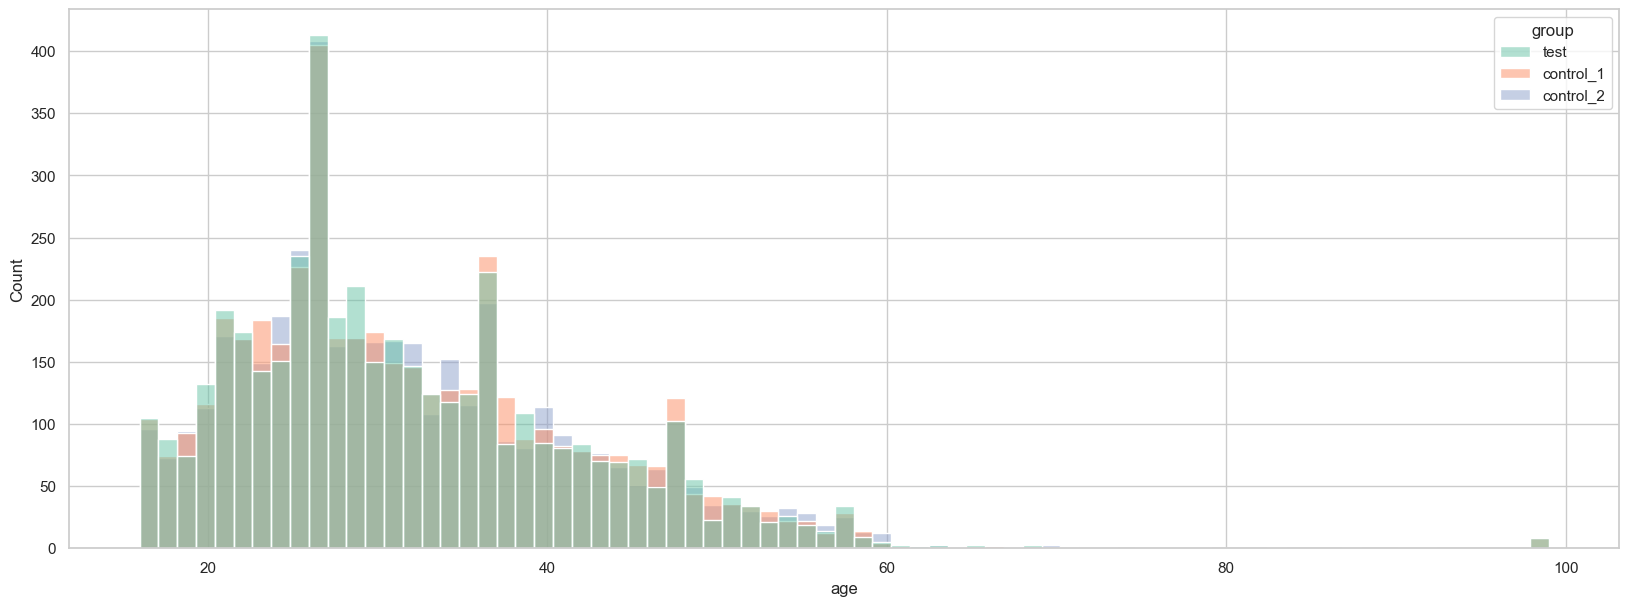

In [359]:
age_distribusion = sns.histplot(data=users, x="age", hue="group")

Распределения асимметричные, по форме отличаются от нормального, что и понятно, учитывая, что скорее всего для пользователей есть какой-то возрастной ценз. Сильных выбросов нет, форма распределения во всех группах схожа. Немного настораживает небольшой пик количества пользователей старше 99 лет в тестовой и первой контрольной группах, проверим не ошибка ли это

In [360]:
ut.query('age > 90')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,group,total_revenue
1747,892285575,99,166,NaN,Germany,"1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,2...",1,50,70,6,NaN,NaN,test,NaN
2281,891321930,99,0,NaN,United States of America,"1,2,4,6",1,50,70,3,NaN,NaN,test,NaN
2374,891305103,99,666,NaN,France,"1,2,3,4,5,6,7,8,9",1,27,36,9,NaN,NaN,test,NaN
2642,892065108,99,475,72.0,France,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,2...",1,16,41,187,1.0,1.0,test,47242.0
2794,891346023,99,0,NaN,Italy,NaN,1,50,70,3,NaN,NaN,test,NaN
3107,891502608,98,33,NaN,Kyrgyzstan,1,1,16,22,30,NaN,NaN,test,NaN
4225,891428367,99,500,NaN,Portugal,1,1,20,47,4,NaN,NaN,test,NaN
4265,891175101,99,587,NaN,Canada,1,1,16,24,182,NaN,NaN,test,NaN


In [361]:
uc1.query('age > 90')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,group,total_revenue
772,891746646,99,300,NaN,Italy,NaN,1,50,70,10,NaN,NaN,control_1,NaN
1465,891918399,99,62,NaN,Italy,"1,2,3",1,50,99,16,NaN,NaN,control_1,NaN
1855,891374112,99,900,NaN,United Arab Emirates,"1,2,3,4,5,6,7,8,9,10,11",1,16,99,462,NaN,NaN,control_1,NaN
2102,892185039,99,759,NaN,United Kingdom (Great Britain),"1,2,3,4,5,6,7,8,9",1,43,49,79,1.0,1.0,control_1,7332.0
2237,892321845,99,500,NaN,United States of America,NaN,1,22,99,4,NaN,NaN,control_1,NaN
2311,891682545,99,0,NaN,United States of America,NaN,1,96,102,0,NaN,NaN,control_1,NaN
2835,891900387,99,333,NaN,Italy,"1,3,4",1,16,99,3,NaN,NaN,control_1,NaN
2907,892335240,98,593,NaN,United States of America,1,1,22,28,32,NaN,NaN,control_1,NaN
3398,892278777,91,384,NaN,United Arab Emirates,1,1,16,23,13,NaN,NaN,control_1,NaN


Возможно, если возраст не указан, то он автоматически проставляется как 99, так как уточнить мы не можем, в целом не вижу причин выбраковывать этих пользователей из выборки

Cравним дисперсии с помощью критерия Левена. Нулевая гипотеза - дисперсии равны.

In [362]:
levene = stats.levene(ut.age, uc1.age, uc2.age)
print(f"Уровень значимости критерия Левена {levene[1]}")
if levene[1] < 0.05:
    print("Дисперсии НЕ равны")
else:
    print("Дисперсии равны")

Уровень значимости критерия Левена 0.7499343576566405
Дисперсии равны


Для сравнения трех групп по возрасту логично использовать однофакторный дисперсионный анализ, но при использовании этого метода распределение данных должно быть нормальным. В нашем случае это не так, значит либо нужно приводить распределение данных к нормальному, например логарифмировать, либо использовать непараметрический тест Краскела-Уоллиса, что мы и сделаем. Нулевая гипотеза - средний возраст в трех группах не различается.

In [363]:
kruskal_age = stats.kruskal(ut.age, uc1.age, uc2.age)

if kruskal_age[1] * 5 < 0.05:  # корректировка множественных сравнений
    print(
        "Обнаружены достоверные различия, в разных группах возраст пользователей отличается"
    )
else:
    print("Достоверные различия НЕ обнаружены, возраст пользователей НЕ отличается")

Достоверные различия НЕ обнаружены, возраст пользователей НЕ отличается


### Половой состав групп 

In [364]:
ut.gender.value_counts()

gender
1    4071
0     200
Name: count, dtype: int64

In [365]:
uc1.gender.value_counts()

gender
1    4136
0     182
Name: count, dtype: int64

In [366]:
uc2.gender.value_counts()

gender
1    4044
0     194
Name: count, dtype: int64

Заметно, что соотношение полов не равное, примерно 20/1, проверим, одинаково ли соотношение полов в каждой из групп. Для этого используем критерий хи-квадрат  

In [367]:
# Создаем таблицу сопряженоси
crosstab_gender = pd.crosstab(users.group, users.gender)
# Оцениваем есть ли различия в половом составе групп с помощью критерия хи-квадрат
# Нулевая гипотеза - половой состав не различается
chi_gender = stats.chi2_contingency(crosstab_gender)
print(
    f"Статистика критерия равна {chi_gender[0].round(4)}, уровень значимости {chi_gender[1].round(4)}"
)
if chi_gender[1] * 5 < 0.05:  # корректировка множественных сравнений
    print(
        "Уровень значимости меньше 0.05, значит мы отвергаем гипотезу о том, что половой состав групп одинаков"
    )
else:
    print(
        "Уровень значимости больше 0.05, значит делаем вывод, что половой состав групп не различается"
    )

Статистика критерия равна 1.2077, уровень значимости 0.5467
Уровень значимости больше 0.05, значит делаем вывод, что половой состав групп не различается


## Привлекательность пользователей

In [368]:
ut.attraction_coeff.describe()

count    4271.000000
mean      315.866542
std       323.224755
min         0.000000
25%         0.000000
50%       250.000000
75%       519.000000
max      1000.000000
Name: attraction_coeff, dtype: float64

In [369]:
uc1.attraction_coeff.describe()

count    4318.000000
mean      311.619037
std       320.936207
min         0.000000
25%         0.000000
50%       237.500000
75%       517.000000
max      1000.000000
Name: attraction_coeff, dtype: float64

In [370]:
uc2.attraction_coeff.describe()

count    4238.000000
mean      317.054271
std       326.028795
min         0.000000
25%         0.000000
50%       250.000000
75%       545.000000
max      1000.000000
Name: attraction_coeff, dtype: float64

Посмотрим на распределения данных

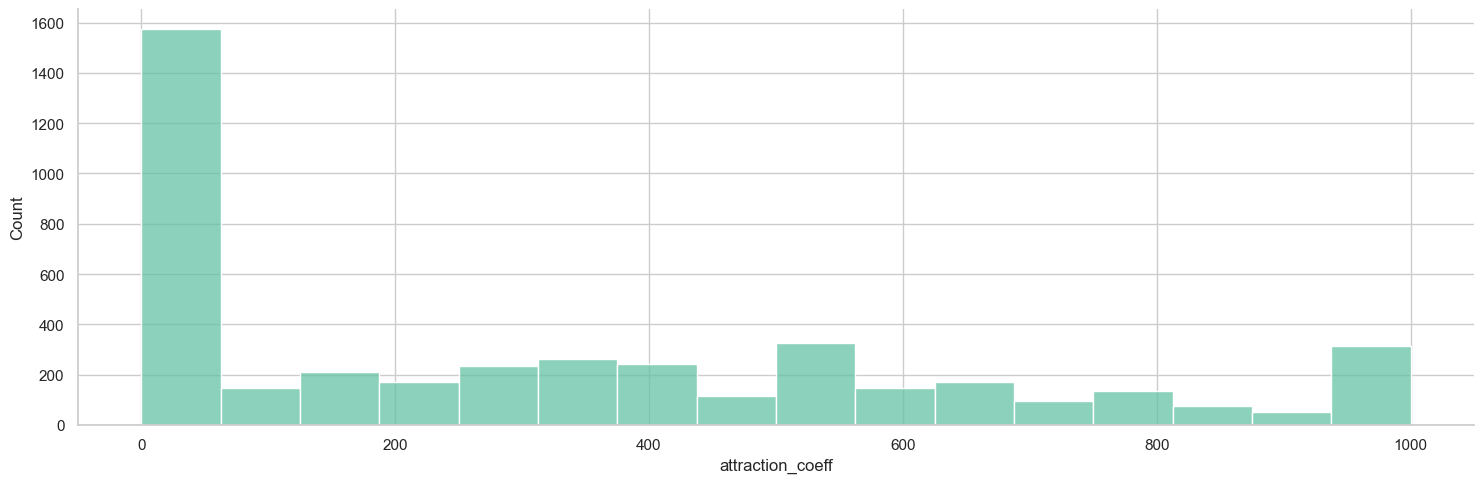

In [371]:
sns.displot(data=ut, x='attraction_coeff', height=5, aspect=3)

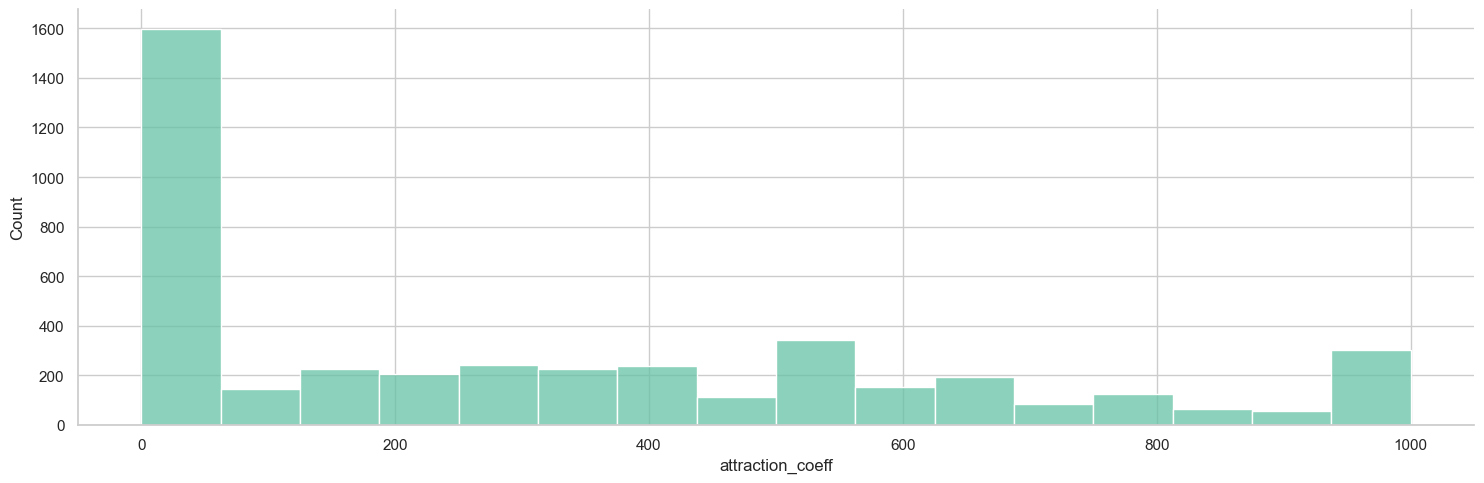

In [372]:
sns.displot(data=uc1, x='attraction_coeff', height=5, aspect=3)

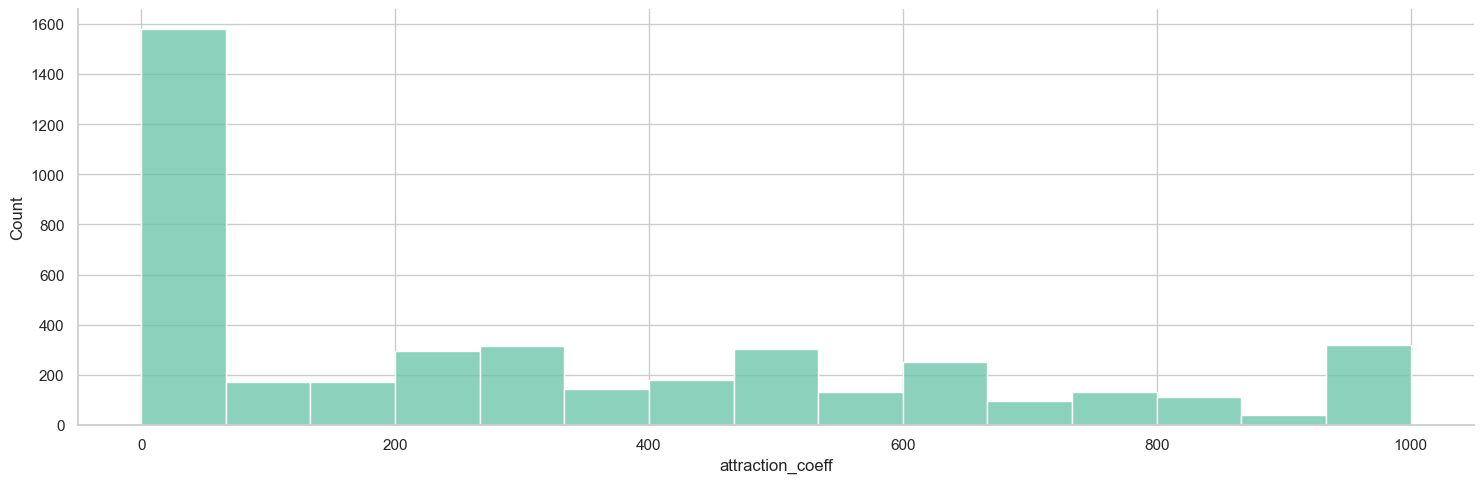

In [373]:
sns.displot(data=uc2, x='attraction_coeff', height=5, aspect=3)

В каждой группе наблюдается значительное количество пользователей с нулевым коэффициентом привлекательности, а также некоторое количество пользователей с коэффициентом, близким к максимальному. Распределение остальных пользователей по коэффициенту привлекательности ближе к равномерному, чем к нормальному. Следует также учитывать, что наши три выборки не являются полностью независимыми. Например, пользователь из тестовой группы, оформивший премиум-подписку, может активнее лайкать людей из контрольных групп, что повысит их коэффициенты привлекательности. В ответ пользователи из контрольных групп, увидев лайки от пользователей тестовой группы, могут также поставить лайк, тем самым повышая коэффициент привлекательности в тестовой группе.

Для оценки различий между группами мы применим критерий Фридмана, который проверяет нулевую гипотезу о том, что все выборки взяты из одного распределения, то есть различия по коэффициенту привлекательности отсутствуют. Одним из условий применения критерия Фридмана является равенство размеров выборок, поэтому их потребуется уровнять по наименьшей. Также предварительно проверим равенство дисперсий выборок с помощью критерия Левена, где нулевая гипотеза предполагает равенство дисперсий.

In [374]:
levene = stats.levene(ut.attraction_coeff,
                      uc1.attraction_coeff, uc2.attraction_coeff)
print(f"Уровень значимости критерия Левена {levene[1]}")
if levene[1] < 0.05:
    print("Дисперсии НЕ равны")
else:
    print("Дисперсии равны")

Уровень значимости критерия Левена 0.4937525724846513
Дисперсии равны


In [375]:
# Количество пользователей в тестовой группе
ut.attraction_coeff.shape[0]

4271

In [376]:
# Количество пользователей в контроле_1
uc1.attraction_coeff.shape[0]

4318

In [377]:
# Количество пользователей в контроле_2
uc2.attraction_coeff.shape[0]

4238

Меньшего всего пользователей в контроле_2, уровняем всех по этому количеству

In [378]:
# Рассчитываем критерий Фридмана
fridman_attraction = stats.friedmanchisquare(
    ut.attraction_coeff.sample(uc2.attraction_coeff.shape[0]),
    uc1.attraction_coeff.sample(uc2.attraction_coeff.shape[0]),
    uc2.attraction_coeff,
)
print(
    f"Критерий Фридмана равен {fridman_attraction[0].round(4)}, уровень значимости {fridman_attraction[1].round(4)}"
)
if fridman_attraction[1] * 5 < 0.05:  # корректировка множественных сравнений
    print("Скорректированный уровень значимости меньше 0.05")
    print(
        "Обнаружены достоверные различия, в разных группах коэффициент привлекательности пользователей отличается"
    )
else:
    print("Скорректированный уровень значимости больше 0.05")
    print(
        "Достоверные различия НЕ обнаружены, коэффициент привлекательности пользователей НЕ отличается"
    )

Критерий Фридмана равен 0.2402, уровень значимости 0.8868
Скорректированный уровень значимости больше 0.05
Достоверные различия НЕ обнаружены, коэффициент привлекательности пользователей НЕ отличается


### Каналы, с которых пользователи першли на страницу оплаты

In [379]:
transactions.from_page.unique()

array(['trial_vip_popup', 'menu', 'autoreply_message',
       'left_sidebar_menu', 'autorefill', 'ad_to_photo', 'gifts', 'none',
       'promo_09', 'super_popup', 'empty_likes', 'empty_mutual',
       'popular_users_chat', 'send_message', 'coins_popup',
       'popular_users_block', 'sympathy', 'delivery_vip', 'fans',
       'dating', 'user_profile', 'likes', 'empty_admins', 'no_sympathy',
       'admins'], dtype=object)

Кажется что это не страницы сторонних сервисов, а страницы этого дейтингового приложения, но все равно изучим

In [380]:
transactions.from_page.nunique()

25

In [381]:
tt.from_page.nunique()

22

In [382]:
tc1.from_page.nunique()

22

In [383]:
tc2.from_page.nunique()

18

Как и в случае с городами, видим отличия в наборе каналов, с которых пользователи из каждой группы переходили на страницу оплаты

In [384]:
from_page = {
    "test": set(tt.from_page.unique()),
    "control_1": set(tc1.from_page.unique()),
    "control_2": set(tc1.from_page.unique()),
}

In [385]:
different_channels = compare_sets(from_page)

Разница между test и control_1:

Элементы в test , которых нет в  control_1: {'delivery_vip', 'likes', 'empty_mutual'}

Элементы в control_1 , которых нет в test: {'empty_admins', 'admins', 'no_sympathy'}


Разница между test и control_2:

Элементы в test , которых нет в  control_2: {'delivery_vip', 'likes', 'empty_mutual'}

Элементы в control_2 , которых нет в test: {'empty_admins', 'admins', 'no_sympathy'}


Разница между control_1 и control_2:

Элементы в control_1 , которых нет в  control_2: set()

Элементы в control_2 , которых нет в control_1: set()




In [386]:
# Количество пользователей из несовпадающих каналов
transactions.query('from_page.isin(@different_channels[0])').uid.count()

10

Думаю, что вряд ли в одном и том же приложении на разных страницах будет разная стоимость премиум подписки, поэтому не будем удалять этих пользователей

In [387]:
# Создаем таблицу сопряженности
crosstab_channels = pd.crosstab(transactions.group, transactions.from_page)
crosstab_channels

from_page,ad_to_photo,admins,autorefill,autoreply_message,coins_popup,dating,delivery_vip,empty_admins,empty_likes,empty_mutual,...,no_sympathy,none,popular_users_block,popular_users_chat,promo_09,send_message,super_popup,sympathy,trial_vip_popup,user_profile
group,,,,,,,,,,,,,,,,,,,,,
control_1,2,2,23,28,2,9,0,2,90,0,...,2,33,8,4,21,3,2,4,56,3
control_2,7,0,20,24,0,10,0,0,96,1,...,0,28,9,1,22,4,0,1,44,1
test,1,0,5,27,1,5,1,0,67,1,...,0,33,2,10,17,1,2,2,48,1


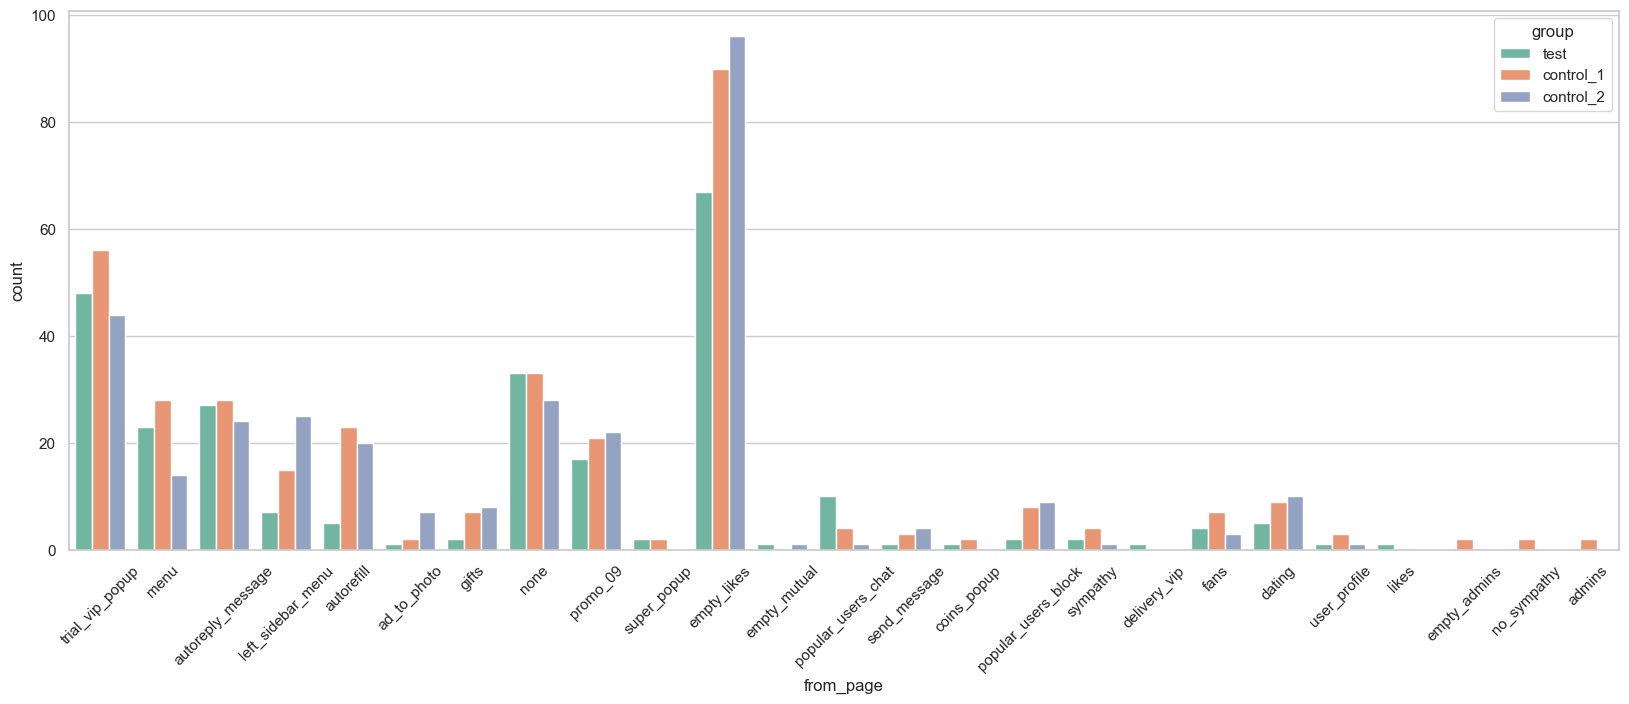

In [388]:
# Строим распределение пользователей по страницам, с которых они переходили на страницу оплаты
sns.countplot(data=transactions, x="from_page", hue="group")
plt.xticks(rotation=45)
plt.show()

Оценим,есть ли различия в распределенияx пользователей с помощью критерия хи-квадрат. Нулевая гипотеза - распределение пользователей по страницам, с которых они перешли на страницу оплаты, НЕ различается.

In [389]:
chi_channels = stats.chi2_contingency(crosstab_channels)
print(
    f"Статистика критерия равна {chi_channels[0].round(4)}, уровень значимости {chi_channels[1].round(4)}"
)
if chi_channels[1] * 5 < 0.05:  # корректировка множественных сравнений
    print(
        "Скорректированный уровень значимости меньше 0.05, распределения пользователей по каналам в трех группах НЕ одинаковое"
    )
else:
    print(
        "Скорректированный уровень значимости больше 0.05, распределение пользователей по каналам в трех группах одинаково"
    )

Статистика критерия равна 77.3065, уровень значимости 0.0046
Скорректированный уровень значимости меньше 0.05, распределения пользователей по каналам в трех группах НЕ одинаковое


Видим, что различия есть. Для того, чтобы понять межу какими конкретно группами, сравним распределения попарно с помощью критерия хи-квадрат. Нулевая гипотеза - распределение пользователей по страницам, с которых они перешли на страницу оплаты, НЕ различается.

In [390]:
# Два контроля
# Отбираем столбцы, в которых хотя бы одно значение не равно нулю
filtered_crosstab = crosstab_channels.loc[
    ["control_1", "control_2"],
    (crosstab_channels.loc[["control_1", "control_2"]] != 0).any(),
]
# Примененяем chi2_contingency к отфильтрованному DataFrame
chi_channels = stats.chi2_contingency(filtered_crosstab)
print(
    f"Статистика критерия равна {chi_channels[0].round(4)}, уровень значимости {chi_channels[1].round(4)}"
)
if chi_channels[1] < 0.05:
    print(
        "Уровень значимости меньше 0.05, распределения пользователей по каналам в двух группах НЕ одинаковое"
    )
else:
    print(
        "Уровень значимости больше 0.05, распределение пользователей по каналам в двух группах одинаково"
    )

Статистика критерия равна 28.4906, уровень значимости 0.16
Уровень значимости больше 0.05, распределение пользователей по каналам в двух группах одинаково


In [391]:
# Тест и контроль_1
# Отбираем столбцы, в которых хотя бы одно значение не равно нулю
filtered_crosstab = crosstab_channels.loc[
    ["control_1", "test"], (crosstab_channels.loc[["control_1", "test"]] != 0).any()
]
# Примененяем chi2_contingency к отфильтрованному DataFrame
chi_channels = stats.chi2_contingency(filtered_crosstab)
print(
    f"Статистика критерия равна {chi_channels[0].round(4)}, уровень значимости {chi_channels[1].round(4)}"
)
if chi_channels[1] < 0.05:
    print(
        "Уровень значимости меньше 0.05, распределения пользователей по каналам в двух группах НЕ одинаковое"
    )
else:
    print(
        "Уровень значимости больше 0.05, распределение пользователей по каналам в двух группах одинаково"
    )

Статистика критерия равна 30.053, уровень значимости 0.183
Уровень значимости больше 0.05, распределение пользователей по каналам в двух группах одинаково


In [392]:
# Тест и контроль_2
# Отбираем столбцы, в которых хотя бы одно значение не равно нулю
filtered_crosstab = crosstab_channels.loc[
    ["control_2", "test"], (crosstab_channels.loc[[
                            "control_2", "test"]] != 0).any()
]
# Примененяем chi2_contingency к отфильтрованному DataFrame
chi_channels = stats.chi2_contingency(filtered_crosstab)
print(
    f"Статистика критерия равна {chi_channels[0].round(4)}, уровень значимости {chi_channels[1].round(4)}"
)
if chi_channels[1] < 0.05:
    print(
        "Уровень значимости меньше 0.05, распределения пользователей по каналам в двух группах НЕ одинаковое"
    )
else:
    print(
        "Уровень значимости больше 0.05, распределение пользователей по каналам в двух группах одинаково"
    )

Статистика критерия равна 51.6249, уровень значимости 0.0002
Уровень значимости меньше 0.05, распределения пользователей по каналам в двух группах НЕ одинаковое


Распределение пользователей по каналам, с которых они переходиои на страницу оплаты любых покупок, различается в тестовой группе и контроле_2. 

Проверим, были ли отличия по страницам с которых  люди переходили для покупки именно премиум подписки

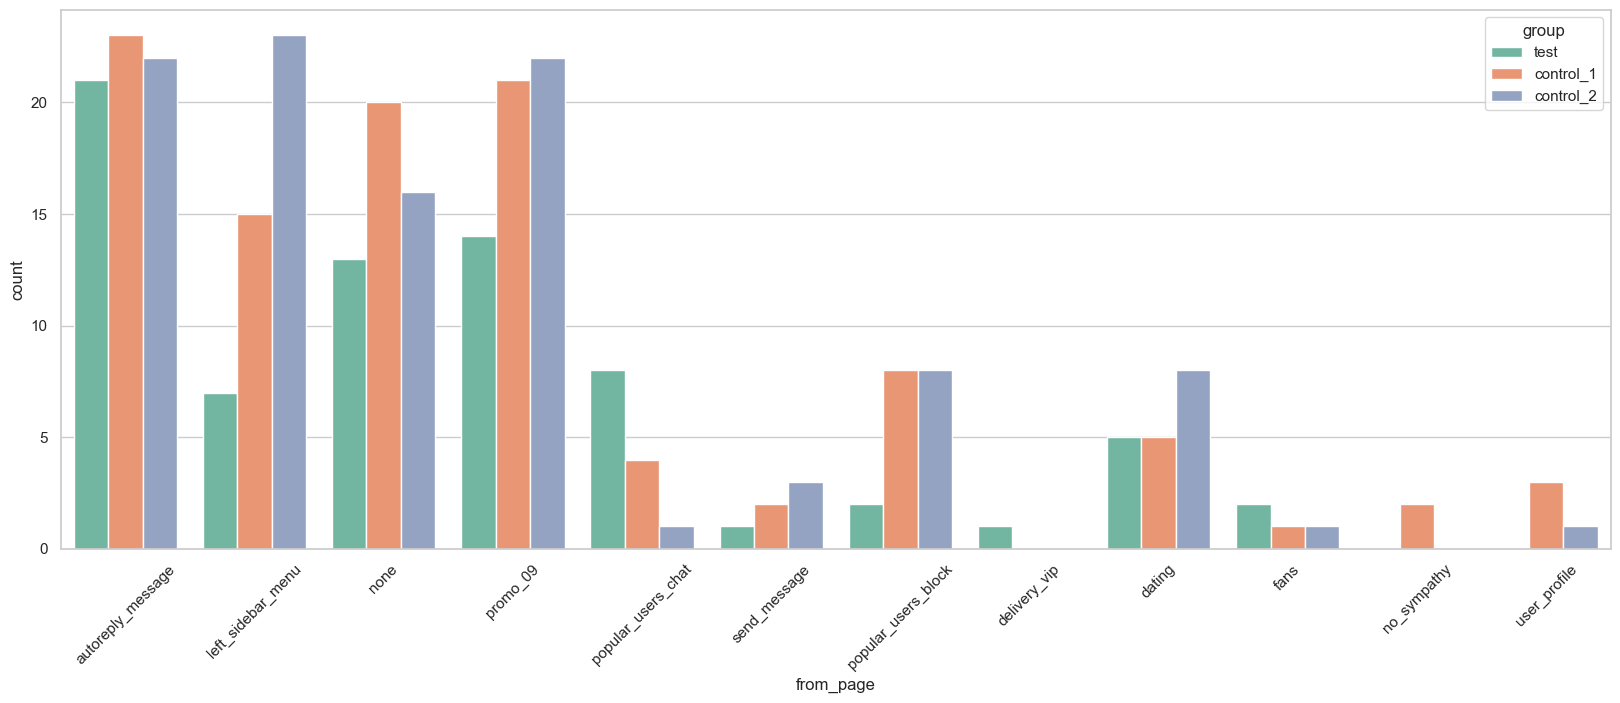

In [393]:
# строим распределение
sns.countplot(
    data=transactions.query('(product_type == "premium_no_trial")'),
    x="from_page",
    hue="group",
)
plt.xticks(rotation=45)
plt.show()

In [394]:
crosstab_channels_premium = pd.crosstab(
    transactions.query('(product_type == "premium_no_trial")').group,
    transactions.query('(product_type == "premium_no_trial")').from_page,
)
crosstab_channels_premium

from_page,autoreply_message,dating,delivery_vip,fans,left_sidebar_menu,no_sympathy,none,popular_users_block,popular_users_chat,promo_09,send_message,user_profile
group,,,,,,,,,,,,
control_1,23,5,0,1,15,2,20,8,4,21,2,3
control_2,22,8,0,1,23,0,16,8,1,22,3,1
test,21,5,1,2,7,0,13,2,8,14,1,0


In [395]:
# Оцениваем есть ли различия распределении каналов, с которых пришли пользователи, с помощью критерия хи-квадрат
# Нулевая гипотеза - распределение каналов не различается
chi_channels_premium = stats.chi2_contingency(crosstab_channels_premium)
print(
    f"Статистика критерия равна {chi_channels_premium[0].round(4)}, уровень значимости {chi_channels[1].round(4)}"
)
if chi_channels_premium[1] < 0.05:
    print(
        "Уровень значимости меньше 0.05, распределения пользователей по каналам в трех группах НЕ одинаковое"
    )
else:
    print(
        "Уровень значимости больше 0.05, распределение пользователей по каналам в трех группах одинаково"
    )

Статистика критерия равна 29.059, уровень значимости 0.0002
Уровень значимости больше 0.05, распределение пользователей по каналам в трех группах одинаково


Значит распределение пользователям по страницам, с которых они перешли на страницу оплаты премиум подписки одинаковое, и этот фактор не должен влиять на целевые метрики

## Вывод по блоку 1.2: 

Три исследуемых датасета (тест, контроль_1, контроль_2) были подготовлены для последующего анализа таким образом, чтобы совпадали период наблюдения и города, в которых живут пользователи. Из всех транзакций с типом "premium_no_trial" оставлены только те, которые имеют "payment_id" равный 147 или 68. Также выявлено, что даты регистрации и оплаты продуктов фиксировались некорректно.
В трех группах (тест, контроль_1, контроль_2) возрастной и половой состав, коэффициент привлекательности и распределение пользователей по странам не различаются.
Соотношение страниц, через которые пользователи переходили на страницу оплаты, различается между тестом и контролем_2, однако если из всех транзакций отобрать только интересующие нас оплаты премиум подписки, то распределение пользователей будет одинаквым.

# 2. Сравниваем контроли между собой

## CR премиум подписку

В задании написано, что "Был проведен A/B тест, в рамках которого для новых пользователей из нескольких стран была изменена стоимость премиум-подписки при покупке через две новые платежные системы. При этом стоимость пробного периода оставалась прежней."

Из этого мы делаем вывод, что потенциально можем получить различия в доле транзакции с меткой "premium_no_trial", и только по ней. А также будет различаться только стоимость первой оформленной подписки (потому что акция распространялась только на новых пользователей)

In [396]:
# Посмотрим,были ли пользователи, которые оформили премиум более одного раза
transactions.query('product_type == "trial_premium"').groupby("uid").agg(
    n_premium=("payment_id", "count")
).sort_values("n_premium", ascending=False).head()

,n_premium
uid,
891297711,2
891174411,1
892037091,1
891962115,1
891977400,1


Да, был один человек ( uid = 891297711), который оформил премиум дважды, посмотрим его транзакции

In [397]:
transactions.query('uid == 891297711')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group,days_before_purchase
105,891297711,Spain,2017-06-11 01:35:00,2017-11-13 03:46:00,12818,147,trial_vip_popup,trial_premium,test,155
177,891297711,Spain,2017-06-11 01:35:00,2017-11-13 03:42:00,12818,147,autoreply_message,trial_premium,test,155


Видим, что не смотря на то, что человек купил подписку два раза, стоимость подписки у него оказалась одинаковой, значит предположение о том, что изменилась цена только на первое оформление подписки не верно. Также видим, что пользователь купил премиум два раза в один день, возможно по ошибке, но в любом случае это не похоже на покупку + продление подписки. Также поскольку есть люди, купившие продукт более одного раза, в дальнейшем надо аггрегировать данные по пользователям.

Проверим, в каком случае пользователю выставляется метка "was_premium" и "is premium". Найдем пользователя, который оформил только пробный период подписки, и посмотрим, что проставлено у него в таблице users

In [398]:
tc1.query('product_type == "trial_premium"').head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
0,891319275,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727,147,trial_vip_popup,trial_premium,control_1
1,892421826,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586,147,trial_vip_popup,trial_premium,control_1
8,892380396,Australia,2017-10-15 09:02:00,2017-10-23 13:27:00,13403,147,trial_vip_popup,trial_premium,control_1
10,892210755,Chile,2017-10-18 17:18:00,2017-10-25 19:29:00,9971,147,trial_vip_popup,trial_premium,control_1
29,892269327,United States of America,2017-10-17 10:09:00,2017-10-24 12:10:00,9789,147,trial_vip_popup,trial_premium,control_1


In [399]:
tc1.query('uid == 891319275')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
0,891319275,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727,147,trial_vip_popup,trial_premium,control_1
326,891319275,France,2017-05-11 19:57:00,2017-05-11 20:05:00,728,146,ad_to_photo,coins,control_1


In [400]:
uc1.query("uid == 891319275")

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,group,total_revenue
2557,891319275,27,0,NaN,France,"1,2,3",1,24,30,2,1.0,1.0,control_1,13455.0


По таблице users CR в покупку премиум (не пробную) посчитать скорее всего не удастся, потому что флаг "was_premium" и "is premium" выставляется даже тем пользователям, которые оформили пробный период. Например, пользователь 891319275 оформлял только пробную подписку, но имеет статус "was_premium" и "is premium". Значит, для того, чтобы отследить, купил ли человек платную подписку, мы добавим в датафреймы отдельную колонку. Добавим колонку сразу во все датасеты, так как эти данные еще потребуются на этапе A/Б тестов.

In [401]:
#  Аггрегируем датафреймы transactions по пользователю, считаем сумму revenue за покупку премиум и мерджим с users
ut = ut.merge(
    tt.query('product_type == "premium_no_trial"')
    .groupby("uid", as_index=False)
    .agg(revenue_for_premium_no_trial=("revenue", "sum")),
    how="left",
    on="uid",
)
uc1 = uc1.merge(
    tc1.query('product_type == "premium_no_trial"')
    .groupby("uid", as_index=False)
    .agg(revenue_for_premium_no_trial=("revenue", "sum")),
    how="left",
    on="uid",
)
uc2 = uc2.merge(
    tc2.query('product_type == "premium_no_trial"')
    .groupby("uid", as_index=False)
    .agg(revenue_for_premium_no_trial=("revenue", "sum")),
    how="left",
    on="uid",
)
users = users.merge(
    transactions.query('product_type == "premium_no_trial"')
    .groupby("uid", as_index=False)
    .agg(revenue_for_premium_no_trial=("revenue", "sum")),
    how="left",
    on="uid",
)

In [402]:
uc1.sample(5)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,group,total_revenue,revenue_for_premium_no_trial
690,891060600,33,527,NaN,Spain,"1,2,3,4,5",1,16,71,36,NaN,NaN,control_1,NaN,NaN
3223,892289100,44,250,NaN,United Arab Emirates,1,1,41,47,32,NaN,NaN,control_1,NaN,NaN
2465,891675132,25,0,NaN,France,"1,2,3,4,5,6,7,8,9,10,11,12,14,15,16",1,17,99,1,NaN,NaN,control_1,NaN,NaN
354,892099536,19,400,NaN,United States of America,"1,2,3,4,6,7,9,11,12,13,14,15,16,17,18,20,21,23",1,16,22,20,NaN,NaN,control_1,NaN,NaN
3585,891342639,52,68,NaN,Italy,1,1,49,55,29,NaN,NaN,control_1,NaN,NaN


In [403]:
# Создаем колонку с флагом, купил пользователь премиум, или нет
users["buy_premium"] = users.revenue_for_premium_no_trial.apply(
    lambda x: 0 if pd.isna(x) == True else 1
)
ut["buy_premium"] = ut.revenue_for_premium_no_trial.apply(
    lambda x: 0 if pd.isna(x) == True else 1
)
uc1["buy_premium"] = uc1.revenue_for_premium_no_trial.apply(
    lambda x: 0 if pd.isna(x) == True else 1
)
uc2["buy_premium"] = uc2.revenue_for_premium_no_trial.apply(
    lambda x: 0 if pd.isna(x) == True else 1
)

In [404]:
users.sample(5)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,group,total_revenue,revenue_for_premium_no_trial,buy_premium
12574,891694854,19,500,NaN,United States of America,NaN,1,16,22,2,NaN,NaN,control_2,NaN,NaN,0
1076,892216956,27,0,NaN,Germany,"1,2,4,5,6,7,8,9,11,12,13,14,15,16,18,19,20,21,...",1,23,30,12,NaN,NaN,test,NaN,NaN,0
5122,892367031,24,428,NaN,United Kingdom (Great Britain),"1,2,3,4,5,6",1,21,27,28,NaN,NaN,control_1,NaN,NaN,0
1697,891892410,39,0,NaN,Italy,"1,2",1,36,42,0,NaN,NaN,test,NaN,NaN,0
1194,892354869,23,583,NaN,United States of America,NaN,1,20,26,12,1.0,1.0,test,7956.0,7956.0,1


Для того, чтобы посчитать CR в платную подписку, нам необходимо поделить количество пользователей, у которых стоит единица в столбце "buy_premium", на общее количество пользователей, то есть оценить среднее значение в этой колонке. Учитывая, что данные все-таки категориальные, используем критерий хи-квадрат, нулевая гипотеза (H₀) заключается в том, что распределение пользователей, купивших и не купивших премиум, независимо от того, в какой группе (контрольной или тестовой) они находятся.

In [405]:
# создаем таблицу сопряженности
crosstab_cr_controls = pd.crosstab(users.query('group != "test"').group,
                                   users.query('group != "test"').buy_premium)
crosstab_cr_controls

buy_premium,0,1
group,,
control_1,4219,99
control_2,4137,101


In [406]:
# Оцениваем с помощью критерия хи-квадрат есть ли различия пользователей с платной подпиской и пользователей без нее
chi_cr_controls = stats.chi2_contingency(crosstab_cr_controls)
print(
    f"Статистика критерия равна {chi_cr_controls[0].round(4)}, уровень значимости {chi_cr_controls[1].round(4)}"
)
if chi_cr_controls[1] < 0.05:
    print(
        "Уровень значимости меньше 0.05, две контрольные группы различаются по CR"
    )
else:
    print(
        "Уровень значимости больше 0.05, две контрольные группы НЕ различаются по CR"
    )

Статистика критерия равна 0.0422, уровень значимости 0.8373
Уровень значимости больше 0.05, две контрольные группы НЕ различаются по CR


In [407]:
# CR в контроле 1
(uc1.buy_premium.mean() * 100).round(2)

2.29

In [408]:
# CR в контроле 2
(uc2.buy_premium.mean() * 100).round(2)

2.38

## AOV для премиум подписки

AOV = Сумма полученной выручки / Количество заказов (покупок)

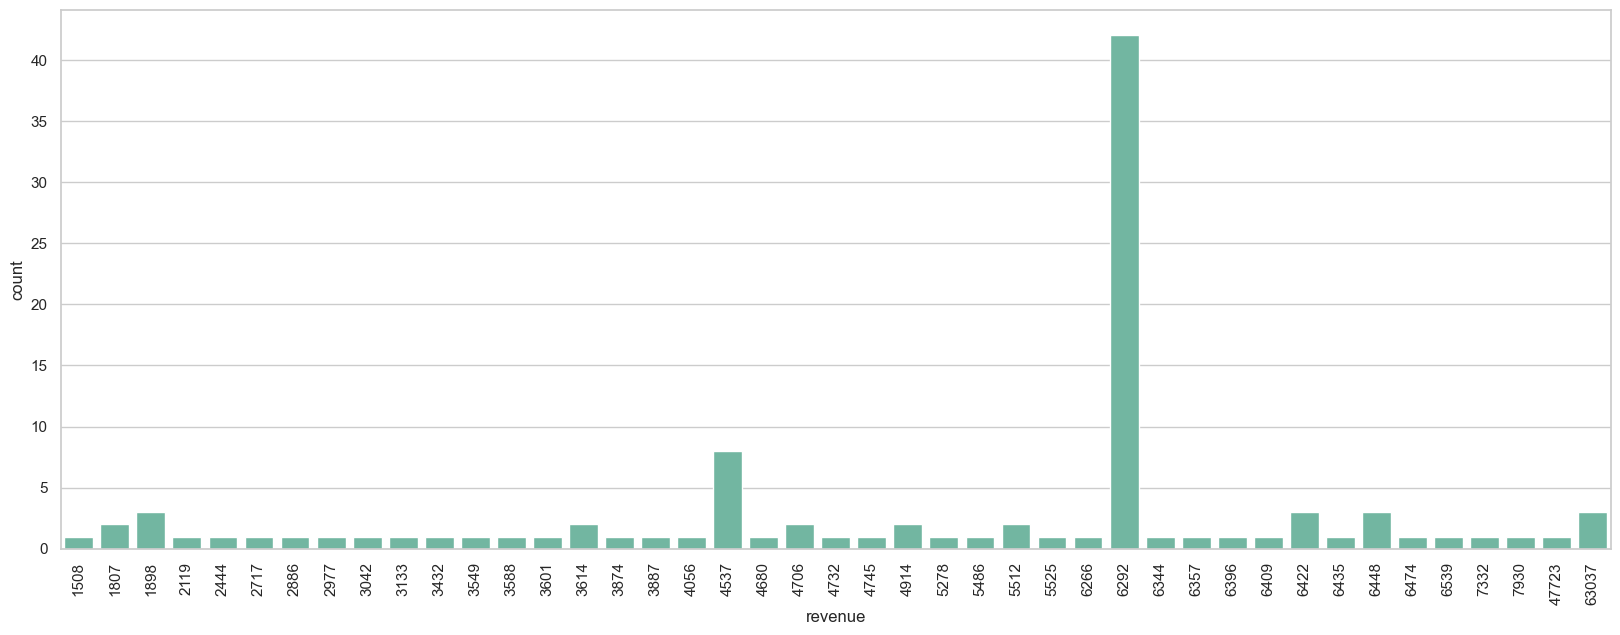

In [409]:
# Посмотрим на распределение пользователей из первой контрольной группы по тратам на премиум подписку
sns.countplot(data=tc1.query(
    'product_type == "premium_no_trial"'), x='revenue')
plt.xticks(rotation=90)
plt.show()

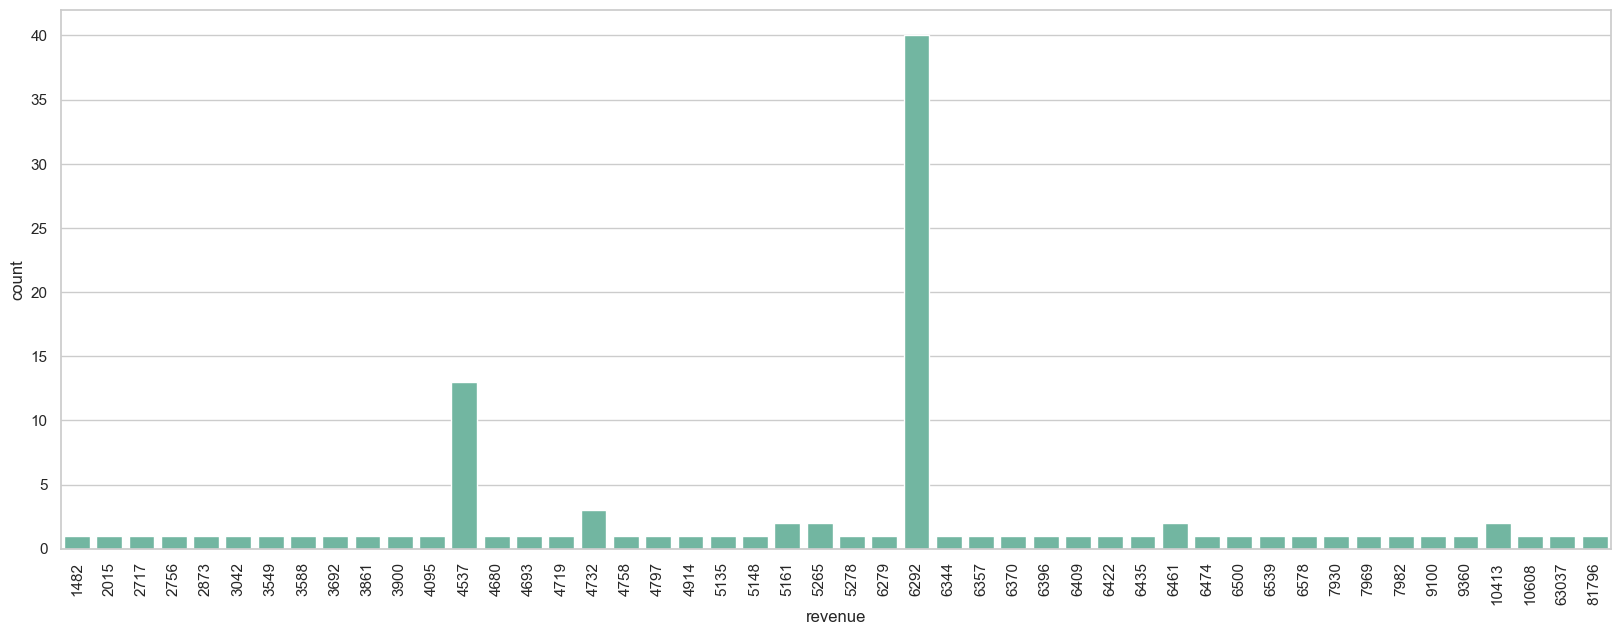

In [410]:
# Посмотрим на распределение пользователей из второй контрольной группы по тратам на премиум подписку
sns.countplot(data=tc2.query(
    'product_type == "premium_no_trial"'), x='revenue')
plt.xticks(rotation=90)
plt.show()

Если подписка оплачивается помесячно, то можно ожидать увидеть на графике распределения какие-то кратные суммы, но таких тут нет. Возможно цена подписки различалась в разных странах. Посмотрим отдельно самую многочисленную группу - пользователей из США

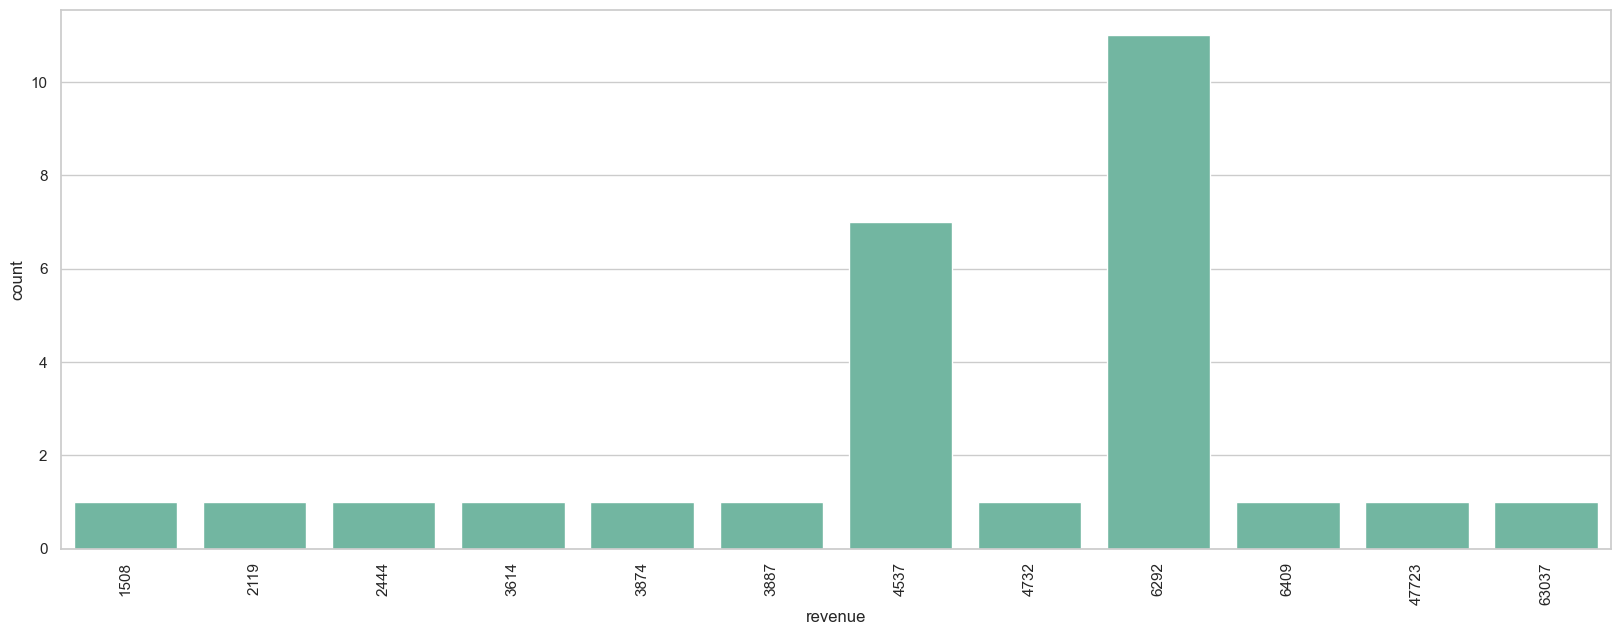

In [411]:
# Посмотрим на распределение пользователей из первой контрольной группы из США по тратам на премиум подписку
sns.countplot(
    data=tc1.query(
        '(product_type == "premium_no_trial")  & (country == "United States of America")'
    ),
    x="revenue",
)
plt.xticks(rotation=90)
plt.show()

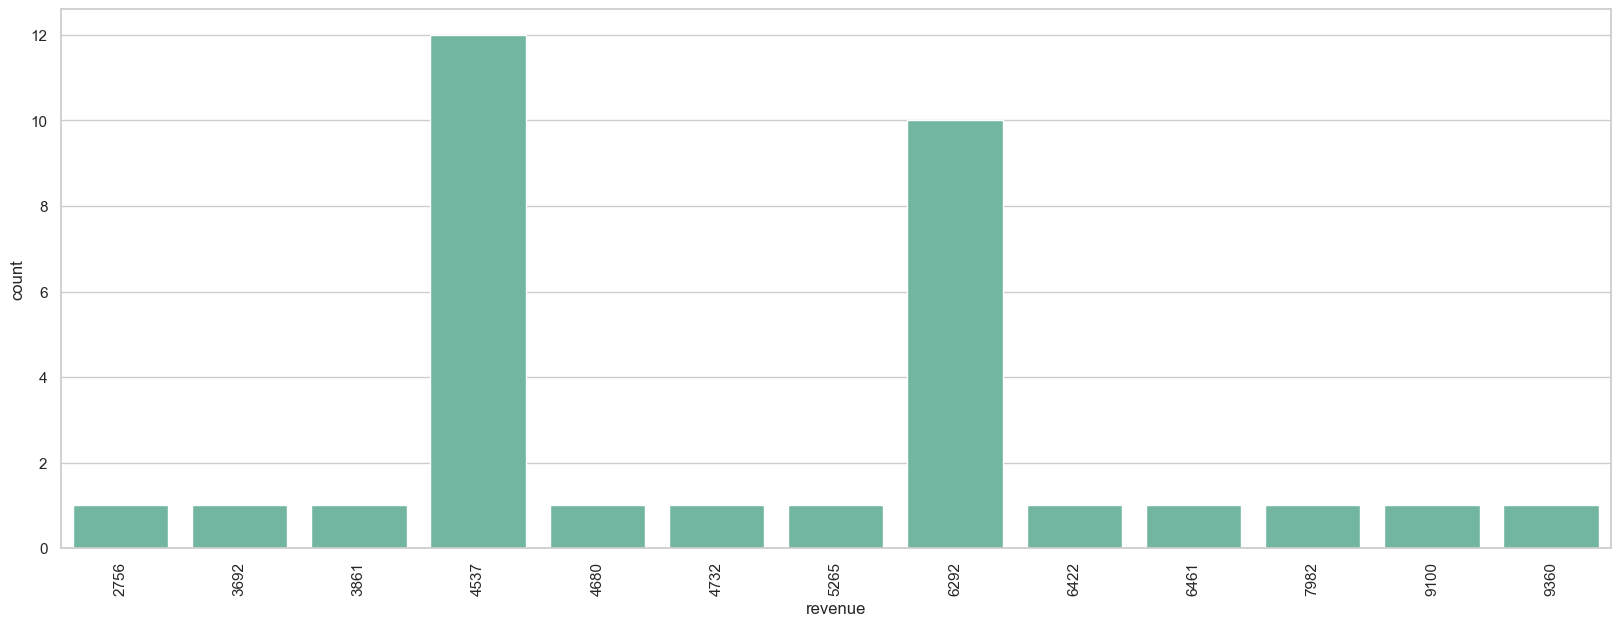

In [412]:
# Посмотрим на распределение пользователей из второй контрольной группы из США по тратам на премиум подписку
sns.countplot(
    data=tc2.query(
        '(product_type == "premium_no_trial")  & (country == "United States of America")'
    ),
    x="revenue",
)
plt.xticks(rotation=90)
plt.show()

Кажется, что базовая стоимость подписки была 6292, и также какая-то существенная часть пользователей покупали подписку также за 4537 (возможно пакетом, или по скидке). Однако есть единичные пользователи, которые покупали подписку по другим ценам, возможно разница цены свяна с колебаниями курса валют, или какими-то другими факторами. Проверим гипотезу о том, что среднее количество денег, потраченное на покупку премиум подписки в двух контрольных группах не различается. 

In [413]:
transactions.sample(10)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group,days_before_purchase
466,892366260,United Kingdom (Great Britain),2017-10-15 15:04:00,2017-10-15 15:07:00,6305,19,menu,coins,control_1,0
635,891553092,Chile,2017-01-11 08:36:00,2017-03-11 19:07:00,6292,147,promo_09,premium_no_trial,control_2,59
534,892185039,United Kingdom (Great Britain),2017-10-19 07:36:00,2017-10-19 07:52:00,7332,147,dating,premium_no_trial,control_1,0
726,892197879,Italy,2017-10-18 22:22:00,2017-10-19 01:57:00,1261,19,autorefill,coins,control_2,0
465,892290105,United States of America,2017-10-16 22:03:00,2017-10-21 22:30:00,4537,147,popular_users_block,premium_no_trial,control_1,5
554,891267633,United States of America,2017-06-11 15:05:00,2017-11-13 04:08:00,6292,147,left_sidebar_menu,premium_no_trial,control_1,154
355,891320823,United States of America,2017-05-11 19:37:00,2017-05-11 23:23:00,3783,67,menu,other_type,control_1,0
437,891806679,Italy,2017-10-27 08:43:00,2017-10-28 12:06:00,6422,147,autoreply_message,premium_no_trial,control_1,1
643,891805089,Italy,2017-10-27 09:35:00,2017-10-31 11:52:00,3913,19,empty_likes,coins,control_2,4
124,892082376,France,2017-10-21 14:19:00,2017-10-21 14:21:00,7930,147,autoreply_message,premium_no_trial,test,0


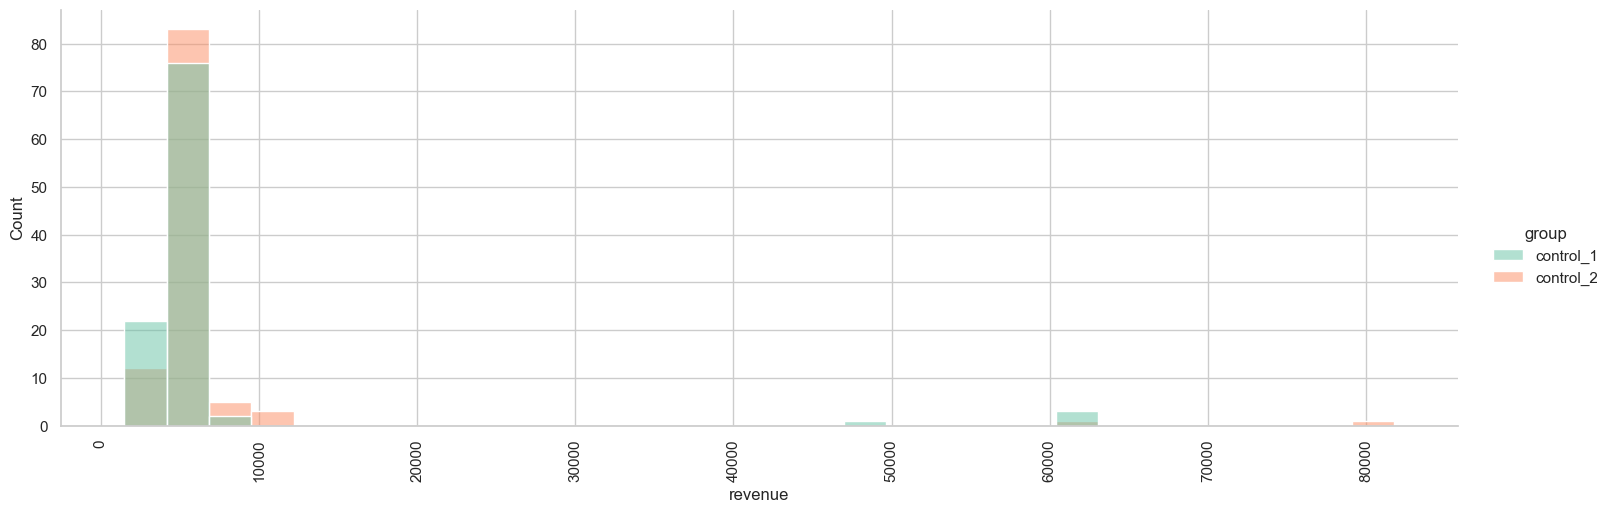

In [414]:
# Посмотрим распределение трат на премиум
sns.displot(data=transactions.query('product_type == "premium_no_trial" & group != "test"'),
            x='revenue',
            hue='group',
            bins=30,
            height=5,
            aspect=3)
plt.xticks(rotation=90)
plt.show()

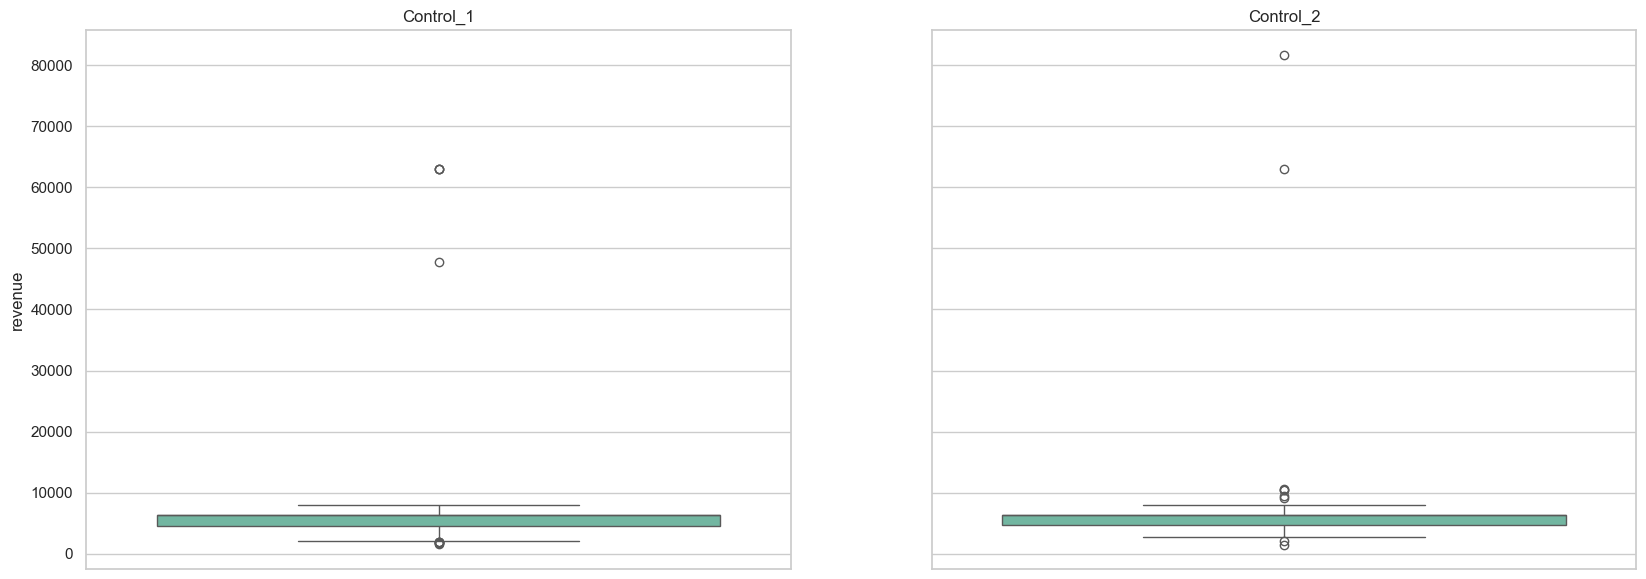

In [415]:
# Отобразим траты на премиум подписку в каждой контрольной группе в виде боксплотов
fig, axes = plt.subplots(1, 2, sharey=True)
sns.boxplot(ax=axes[0], data=tc1.query(
    'product_type == "premium_no_trial"'), y="revenue")
sns.boxplot(ax=axes[1], data=tc2.query(
    'product_type == "premium_no_trial"'), y="revenue")
axes[0].set_title("Control_1")
axes[1].set_title("Control_2")
plt.show()

Похоже, что распределение не является нормальным, бОльшая часть пользователей купили подписку по цене до 20 000, но судя по всему есть люди которые потратили  на покупку премиум подписки в разы больше, чем остальные. Посмотрим подробнее на тех, кто много потратил

In [416]:
# Кто из пользователей в контроле_1 потратил на премиум подписку больше 20000
uc1.query('revenue_for_premium_no_trial > 20000')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,group,total_revenue,revenue_for_premium_no_trial,buy_premium
283,892421277,22,446,62.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,16,35,130,1.0,1.0,control_1,60333.0,47723.0,1
867,891383310,22,1000,NaN,Turkey,1,1,19,83,4,1.0,1.0,control_1,63037.0,63037.0,1
1416,892333905,22,175,3608.0,Italy,"1,2,3,4,5,6,7,15",1,19,25,575,1.0,1.0,control_1,403104.0,63037.0,1
2282,892216461,19,293,6.0,United States of America,"1,2,3,5,8,9,11,13,15,16,17,18,19,20,22,23,24,2...",1,16,25,58,1.0,1.0,control_1,64298.0,63037.0,1


In [417]:
# Кто из пользователей в контроле_2 потратил на премиум подписку больше 20000
uc2.query('revenue_for_premium_no_trial > 20000')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,group,total_revenue,revenue_for_premium_no_trial,buy_premium
1209,892307238,29,543,43.0,Spain,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,16,36,46,1.0,1.0,control_2,75647.0,63037.0,1
1353,891778551,30,290,NaN,United Arab Emirates,"1,6,7,8,9,10",1,27,33,31,1.0,1.0,control_2,81796.0,81796.0,1


Похоже, что люди, потратившие на премиум более 20 000 могут быть нашими топовыми подписчиками, поэтому не будем исключать их из выборки

Для дальнейшего выбора метода проверим, соответствует ли распределение нормальному с помощью критерия Колмогорова-Смирнова. Нулевая гипотеза - распределение данных соответствует нормальному. Также проверим равенство дисперсий в двух группах с помощью критерия Левена. Нулевая гипотеза - дисперсии равны.

In [418]:
# Критерий Колмогорова-Смирнова для трат на покупку премиум в контроле_1
stats.kstest(tc1.query('product_type == "premium_no_trial"').revenue, 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1508, statistic_sign=-1)

In [419]:
# Критерий Колмогорова-Смирнова для трат на покупку премиум в контроле_1
stats.kstest(tc2.query('product_type == "premium_no_trial"').revenue, 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1482, statistic_sign=-1)

Уровень значимости а обоих случаях меньше 0.05, следовательно отвергаем нулевую гипотезу, распределения трат на премиум подписку в обоих контрольных группах отличаются от нормального

In [420]:
# Рассчитываем критерий Левена
stats.levene(tc1.query('product_type == "premium_no_trial"').revenue, 
             tc2.query('product_type == "premium_no_trial"').revenue)

LeveneResult(statistic=0.3509742184520781, pvalue=0.5542087500331045)

Уровень значимости меньше 0.05, значит мы не можем отклонить нулевую гипотезу, дисперсия средних трат на премиум в обоих контрольных группах равна

Итак, мы знаем, что две контрольные выборки имеют асимметричное распределение, отличающее от нормального. Дисперсии в группах равны. В этой ситуации для сравнения групп можно
1. Использовать непараметрический критерий Манна-Уитней, который, согдасно документации scipy, проверяет гипотезу о равенстве распределений в двух выборках. Однако, если верить разбору, приведенному https://habr.com/ru/companies/avito/articles/709596/, этот критерий по нескольким причинам не очень хорошо подходит для A/Б тестов, например, потому что дает много ложных срабатываний. Это не говоря уже о том, что нулевая гипотеза не очень подходит, когда мы говорим о среднем чеке.
2. Использовать бутсрап или перестановочный тест, но это ресурсоемкий подход.
3. В случае, если размер выборки достаточно большой (например, больше сотни экземпляров в каждой выборке как у нас), начинает работать центральная предельная теорема. ЦПТ гласит, что с увеличением размера выборки распределение выборочного среднего стремится к нормальному распределению, даже если исходное распределение не является нормальным. Таким образом, если выборки состоят из большого количества данных, то результаты т-теста могут быть приемлемыми, даже если исходные данные не подчиняются нормальному распределению. Поэтому для дальнейшего анализа используем т-тест. Согласно документации к scipy.stats.ttest_ind, он проверяет нулевую гипотезу о том, что средние значения в двух выборках равны. 

In [421]:
# В среднем пользователи из контроля_1 потратили на покупку премиум подписки
tc1.query('product_type == "premium_no_trial"').revenue.mean().round(2)

7370.62

In [422]:
# 95% доверительный интервал для AOV в контроле_1
stats.t.interval(0.95, df=len(tc1.query('product_type == "premium_no_trial"').revenue.values)-1,
                 loc=np.mean(
                     tc1.query('product_type == "premium_no_trial"').revenue.values),
                 scale=stats.sem(tc1.query('product_type == "premium_no_trial"').revenue.values))

(5309.078073614466, 9432.171926385534)

In [423]:
# В среднем пользователи из контроля_2 потратили на покупку премиум подписки
tc2.query('product_type == "premium_no_trial"').revenue.mean().round(2)

7009.85

In [424]:
# 95% доверительный интервал для AOV в контроле_2
stats.t.interval(0.95, df=len(tc2.query('product_type == "premium_no_trial"').revenue.values)-1,
                 loc=np.mean(
                     tc2.query('product_type == "premium_no_trial"').revenue.values),
                 scale=stats.sem(tc2.query('product_type == "premium_no_trial"').revenue.values))

(5195.402182792783, 8824.293055302456)

In [425]:
# Считаем значения т-критерия и уровень значимости
stats.ttest_ind(tc1.query('product_type == "premium_no_trial"').revenue,
                tc2.query('product_type == "premium_no_trial"').revenue)

TtestResult(statistic=0.26067813326542766, pvalue=0.7945998695199628, df=207.0)

Уровень значимости больше 0.05, значит мы принимаем нулевую гипотезу о том, что средние траты на премиум-подписку равны в двух контрольных группах.

## ARPU

ARPU = суммарный доход / количество пользователей. Тоесть это просто среднее значение из total_revenue в таблицах users

Оценим ARPU за весь период наблюдений, поскольку у какая-то проблема с записью дат и расчет по-месячно может быть некорректный

In [426]:
# Заменим NaN нули
uc1.total_revenue = uc1.total_revenue.fillna(0)
uc2.total_revenue = uc2.total_revenue.fillna(0)
ut.total_revenue = ut.total_revenue.fillna(0)
users.total_revenue = users.total_revenue.fillna(0)

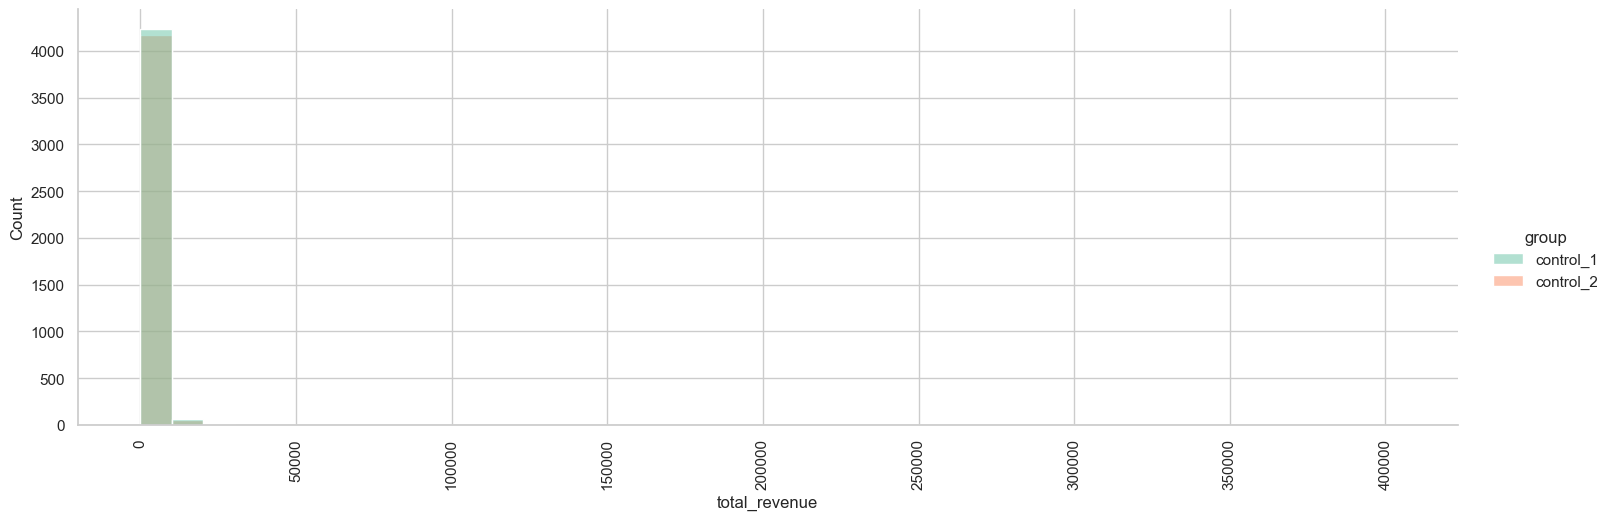

In [427]:
# Построим распределение дохода от пользователей в двух контролях
sns.displot(data=users.query('group != "test"'),
            x='total_revenue',
            hue='group',
            bins=40,
            height=5,
            aspect=3)
plt.xticks(rotation=90)
plt.show()

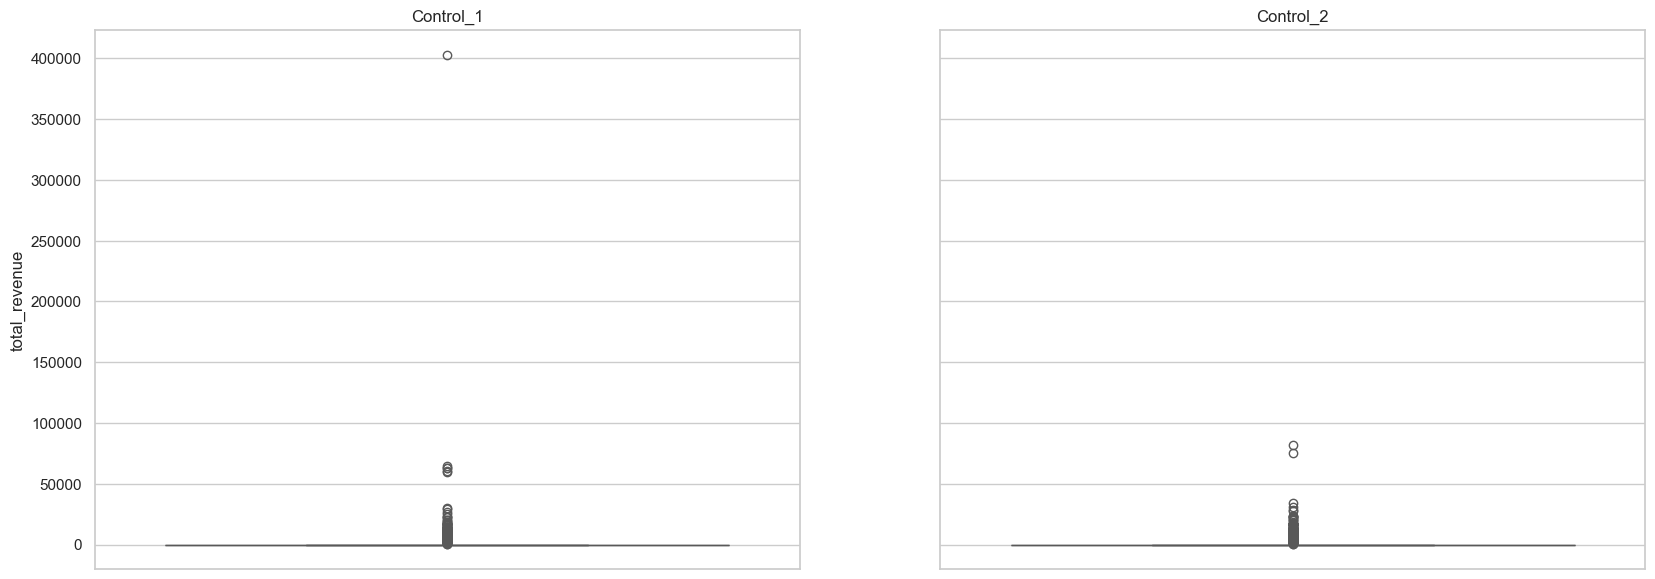

In [428]:
# Отобразим суммарные траты пользователей двух контрольных групп в виде боксплотов
fig, axes = plt.subplots(1, 2, sharey=True)
sns.boxplot(ax=axes[0], data=uc1, y="total_revenue")
sns.boxplot(ax=axes[1], data=uc2, y="total_revenue")
axes[0].set_title("Control_1")
axes[1].set_title("Control_2")
plt.show()

Видим, что подавляющее большинство пользователей ничего не тратили, есть какое-то количество пользователей, которые потратили до 40 000, но единичные пользователи, которые тратят очень много

In [429]:
# Кто из пользователей в контроле_1 потратил больше 200000
uc1.query('total_revenue > 350000')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,group,total_revenue,revenue_for_premium_no_trial,buy_premium
1416,892333905,22,175,3608.0,Italy,"1,2,3,4,5,6,7,15",1,19,25,575,1.0,1.0,control_1,403104.0,63037.0,1


In [430]:
# Кто из пользователей в контроле_2 потратил больше 200000
uc2.query('total_revenue > 350000')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,group,total_revenue,revenue_for_premium_no_trial,buy_premium


Мы видим, что в котроле_1 есть один человек, который потралил 403 000, что в разы больше, чем другие. В контроле_2 нет людей, которые тратили  бы сопоставимую сумму

Проверим, соответствует ли распределение дохода нормальному в контрольных группах с помощью критерия Колмогорова-Смирнова. Нулевая гипотеза - распределение данных соответствует нормальному. Также проверим равенство дисперсий в двух группах с помощью критерия Левена. Нулевая гипотеза - дисперсии равны.

In [431]:
# Рассчитываем критерий Колмогорова-Смирнова для контроля_1
stats.kstest(uc1.total_revenue, 'norm')

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

In [432]:
# Рассчитываем критерий Колмогорова-Смирнова для контроля_2
stats.kstest(uc2.total_revenue, 'norm')

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

В обоих случаях уровень значимости меньше 0.05, значит отвергаем нулевую гипотезу о соответсвии данных нормальному распределению

In [433]:
# Проводим тест Левена на равенство дисперсий
stats.levene(uc1.total_revenue, uc2.total_revenue)

LeveneResult(statistic=1.3707826604532485, pvalue=0.24171007189856697)

Уровень значимости больше 0.05, значит принимаем нулевую гипотезу о равенстве выборочных дисперсий. В первом контроле был человек, который потратил 400 000. Поскольку дисперсии равны, удалять его из выборки не будем, но на всякий случай помним, что если мы получим достоверные различия между группами, то надо будет проверить, не повлиял ли на факт различий наш "выброс"

In [434]:
uc1.shape

(4318, 16)

Варианты дальнейшего анализа такие же, как и в случае со средним чеком за премиум-подписку: критерий Манна-Уитней, бутстрап и т-тест. Так же как и в случае AOV, руководствуясь внушительным объемом выборки (порядка 4000 человек) проведем т-тест, не смотря на то, что форма распределения сильно отличается от нормального. Нулевая гипотеза - средние доход от пользователя, т.е. ARPU, равны в двух группах

In [435]:
# ARPU в контроле_1
uc1.total_revenue.mean().round(2)

577.58

In [436]:
# 95% доверительный интервал для ARPU в контроле_1
stats.t.interval(0.95, df=len(uc1.total_revenue.values)-1,
                 loc=np.mean(uc1.total_revenue.values),
                 scale=stats.sem(uc1.total_revenue.values))

(373.14200400140874, 782.0214976197122)

In [437]:
# ARPU в контроле_2
uc2.total_revenue.mean().round(2)

444.33

In [438]:
# 95% доверительный интервал для ARPU в контроле_2
stats.t.interval(0.95, df=len(uc2.total_revenue.values)-1,
                 loc=np.mean(uc2.total_revenue.values),
                 scale=stats.sem(uc2.total_revenue.values))

(358.6552662359906, 530.0011754818008)

In [439]:
# Рассчитываем т-критерий
stats.ttest_ind(uc1.total_revenue, uc2.total_revenue)

TtestResult(statistic=1.1708042793111273, pvalue=0.24171007189770613, df=8554.0)

Уровень значимости больше 0.05, значит принимаем нулевую гипотезу о равенстве ARPU в двух группах

## Retention rate

Retention rate показывает отношение клиентов, которые вернулись в приложение на n-ый день, к числу клиентов на начало расчетного периода. Мы будем считать началом рассчетного периода момент регистрации. Рассчитаем retention на 7, 14, 30 и 60 дни.

Для этого распакуем колонку visit_days датафреймов users в отдельные строки

In [440]:
dfs = [ut, uc1, uc2, users]

for df in dfs:
    # Заполняем пропуски нулями
    df.visit_days = df.visit_days.fillna(0)
    # Изменяем тип данных на строковый
    df.visit_days = df.visit_days.astype("str")
    # Преобразуем колонку в список
    df.visit_days = df.visit_days.str.strip().str.split(",")

# Распаковываем список из visit_days в отдельные строки
exploded_ut = ut.explode("visit_days")
exploded_uc1 = uc1.explode("visit_days")
exploded_uc2 = uc2.explode("visit_days")
exploded_users = users.explode("visit_days")

In [441]:
exploded_users.head(5)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,group,total_revenue,revenue_for_premium_no_trial,buy_premium
0,892309896,27,685,NaN,United States of America,1,1,24,30,89,NaN,NaN,test,0.0,NaN,0
0,892309896,27,685,NaN,United States of America,2,1,24,30,89,NaN,NaN,test,0.0,NaN,0
0,892309896,27,685,NaN,United States of America,3,1,24,30,89,NaN,NaN,test,0.0,NaN,0
0,892309896,27,685,NaN,United States of America,4,1,24,30,89,NaN,NaN,test,0.0,NaN,0
0,892309896,27,685,NaN,United States of America,5,1,24,30,89,NaN,NaN,test,0.0,NaN,0


In [442]:
# Поменяем тип данных в колонке visit_days на целое число
exploded_ut.visit_days = exploded_ut.visit_days.astype('int')
exploded_uc1.visit_days = exploded_uc1.visit_days.astype('int')
exploded_uc2.visit_days = exploded_uc2.visit_days.astype('int')
exploded_users.visit_days = exploded_users.visit_days.astype('int')

In [443]:
days = [7, 14, 30, 60]
groups = {
    "control_1": exploded_users.query('group == "control_1"'),
    "control_2": exploded_users.query('group == "control_2"'),
}
retention = pd.DataFrame({7: [], 14: [], 30: [], 60: []})

for key, value in groups.items():
    for day in days:
        ret = round(
            value.query("visit_days == @day").uid.nunique() /
            value.uid.nunique() * 100,
            2,
        )
        retention.loc[key, day] = ret

In [444]:
retention

,7,14,30,60
control_1,24.11,12.07,0.83,0.46
control_2,23.76,11.18,1.09,0.61


Поскольку ретеншн — это метрика, представляющая собой отношение (долю пользователей, которые остались активными), судить о достоверности различий в retention между тестовой и контрольной группами можно следующими методами:
1. Построение доверительных интервалов с помощью бутстрепа. Это гибкий и надежный способ оценки различий в метрике, но может оказаться ресурсозатратным, особенно при больших объемах данных или многочисленных группах.
2. Использование таблиц сопряженности для каждого дня. Для каждого дня составляется таблица, в которой фиксируется количество пользователей, которые покинули приложение, и количество оставшихся пользователей в тестовой и контрольной группах. После этого проводится проверка с помощью критерия хи-квадрат, чтобы выяснить, зависят ли пропорции пользователей от принадлежности к группе (контроль_1/контроль_2).
Если соотношение активных и неактивных пользователей значительно различается между группами, это будет свидетельствовать о статистически значимом различии.

Итоговый алгоритм:
1. Для каждого дня (7, 14, 30, 60) составить таблицу сопряженности
2. Применить критерий хи-квадрат для проверки зависимости между группой и активностью пользователей.
3. Добавить в итоговую таблицу строку "different", которая будет содержать значение True, если между тестовой и контрольной группами обнаружены достоверные различия для конкретного дня.

In [445]:
# Функция для проверки различий Retention Rate
def check_retention_difference(data, days, groups):
    results = []

    # Перебираем дни, для которых нужно сравнить retention
    for day in days:
        # Фильтруем пользователей, которые заходили в указанный день
        active_group_1 = data.query(
            "visit_days == @day and group == @groups[0]").uid.nunique()
        active_group_2 = data.query(
            "visit_days == @day and group == @groups[1]").uid.nunique()

        # Общее количество пользователей в каждой группе
        total_group_1 = data.query("group == @groups[0]").uid.nunique()
        total_group_2 = data.query("group == @groups[1]").uid.nunique()

        # Число неактивных пользователей
        inactive_group_1 = total_group_1 - active_group_1
        inactive_group_2 = total_group_2 - active_group_2

        # Таблица сопряженности для chi-square
        contingency_table = np.array([
            [active_group_1, inactive_group_1],  # контрольная группа
            [active_group_2, inactive_group_2]         # тестовая группа
        ])

        # Применяем хи-квадрат тест
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

        # Добавляем результаты в итоговую таблицу
        results.append({
            'day': day,
            'retention_rate_'+groups[0]: round(active_group_1 / total_group_1 * 100, 2),
            'retention_rate_'+groups[1]: round(active_group_2 / total_group_2 * 100, 2),
            'chi2_statistic': chi2,
            'p_value': p,
            'different': p < 0.05
        })

    # Возвращаем DataFrame с результатами
    return pd.DataFrame(results)

In [446]:
groups = ['control_1', 'control_2']
days = [7, 14, 30, 60]
retention_results = check_retention_difference(
    exploded_users, days=days, groups=groups)
retention_results

,day,retention_rate_control_1,retention_rate_control_2,chi2_statistic,p_value,different
0,7,24.11,23.76,0.123164,0.725628,False
1,14,12.07,11.18,1.531644,0.215866,False
2,30,0.83,1.09,1.174636,0.278451,False
3,60,0.46,0.61,0.644523,0.422078,False


В каждый из целевых дней (7, 14, 30, 60) retention rate двух контрольных групп достоверно не различались

# Вывод по блоку 2

Две контрольные группы не различалются между собой по CR в премиум подписку, AOV за премиум, ARPU, retention rate na 7, 14, 30, 60 дни

Поскольку ни по одному из исследуемых показателей контрольные группы не отличались, оставим только одну из них для дальнейшего анализа

In [447]:
# Устанавливаем фиксированный seed
random.seed(41)
# Генерируем случайное число
random_number = random.randint(1, 2)
print(f"Оставляем контроль {random_number}")

Оставляем контроль 2


# 3. Проводим A/Б тесты, сравниваем тестовую группу и контроль 2

## СR в покупку премиум подписки

На втором этапе анализа, когда мы сравнивали контрольные группы, мы добавили в датафреймы users колонку buy_premium, где проставлено значение 1 для пользователей, купивших премиум (не пробную версию), и 0 для тех, кто не совершал покупку. Для расчета коэффициента конверсии (CR) мы берем среднее по этой колонке, что дает долю пользователей, оформивших премиум-подписку.

Чтобы сравнить CR в контрольной и тестовой группах, нужно проверить, зависит ли распределение пользователей по тем, кто купил премиум, и тем, кто не купил, от принадлежности к группе. Для этого мы применяем критерий хи-квадрат, где нулевая гипотеза (H₀) заключается в том, что распределение пользователей, купивших и не купивших премиум, независимо от того, в какой группе (контрольной или тестовой) они находятся.

In [448]:
# Создаем таблицу сопряженности
crosstab_cr_t_c = pd.crosstab(users.query('group != "control_1"').group,
                              users.query('group != "control_1"').buy_premium)
crosstab_cr_t_c

buy_premium,0,1
group,,
control_2,4137,101
test,4205,66


In [449]:
# Рассчитываем критерий хи-квадрат для этой таблицы
chi_cr_t_c = stats.chi2_contingency(crosstab_cr_t_c)
print(
    f"Статистика критерия равна {chi_cr_t_c[0].round(4)}, уровень значимости {chi_cr_t_c[1].round(4)}"
)
if chi_cr_t_c[1] < 0.05:
    print(
        "Уровень значимости меньше 0.05, CR в контроле и тесте достоверно различается"
    )
else:
    print(
        "Уровень значимости больше 0.05, контрольная и тестовая группы НЕ различаются по CR"
    )

Статистика критерия равна 7.3324, уровень значимости 0.0068
Уровень значимости меньше 0.05, CR в контроле и тесте достоверно различается


In [450]:
# CR в тестовой группе
(ut.buy_premium.mean() * 100).round(2)

1.55

In [451]:
# CR в контрольной группе
(uc2.buy_premium.mean() * 100).round(2)

2.38

## CR в покупку премиум: вывод

1. Изменение стоимости премиум подписки привело к достоверному снижению конверсии в подписку с 2.38 до 1.55 процентов
2. Цифра в 2 процента кажется вполне адекватной исходя из этих отчетов https://apptractor.ru/measure/user-analytics/marketing-podpisnyh-prilozheniy-2022-otchet-appsflyer-i-liftoff.html

## CR Дополнительный анализ

Мы установили, что конверсия в покупку премиум подписки снизилась, однако есть пользователи, готовые покупать подписку и по более высокой цене. Опишем эту группу.

Возраст

In [452]:
ut.query('buy_premium == 1').age.describe()

count    66.000000
mean     32.590909
std      12.151578
min      17.000000
25%      24.000000
50%      32.000000
75%      37.750000
max      99.000000
Name: age, dtype: float64

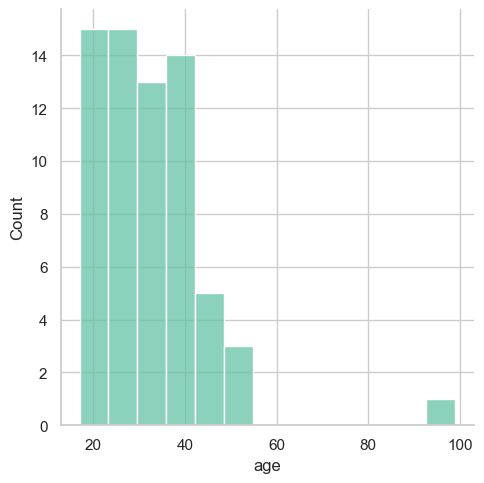

In [453]:
sns.displot(data=ut.query('buy_premium == 1'), x='age')
plt.tight_layout()
plt.show()

In [454]:
ut.query('buy_premium == 1').age.quantile(0.9)

43.5

In [455]:
ut.query('buy_premium == 1').age.quantile(0.1)

21.0

Возраст 80% пользователей, купивших премиум подписку по более высокой цене колеблется от 21 до 43 лет, половина купивших премиум по более высокой цене имеют возраст от 24 до 38 лет

Пол

In [456]:
ut.query('buy_premium == 1').gender.value_counts()

gender
1    66
Name: count, dtype: int64

Только мужчины покупали подписку по более высокой цене

География

Посмотрим, пропорционально ли число пользователей, оформивших платную подписку по более высокой цене, общему количеству пользователей из определенных стран. По графику это не очень хорошо будет видно 

In [457]:
# Сколько пользователей из каждой страны купили премиум по повышенной цене
country_premium = ut.query('buy_premium == 1').country.value_counts()

In [458]:
# Сколько пользователей из каждой страны установили приложение в тестовой группе
all_countries = ut.country.value_counts()

In [459]:
# Считаем для каждой страны соотношение купивших премиум к общему количеству пользователей (в тестовой группе)
premium_ratio = (country_premium / all_countries * 100).round(1)
# Объединяем по индексу с количеством купивших премиум по повышенной цене
premium_per_countries = pd.concat([premium_ratio, country_premium], axis=1)
# Переименовываем колонки
premium_per_countries.columns = ["premium_rate", "n_premium_buyers"]
premium_per_countries.sort_values("premium_rate", ascending=False)

,premium_rate,n_premium_buyers
country,,
Turkey,20.0,1.0
Mexico,14.3,1.0
United Kingdom (Great Britain),3.0,5.0
United Arab Emirates,2.7,6.0
Canada,2.2,3.0
Italy,2.2,7.0
Spain,2.0,6.0
Israel,1.9,2.0
Australia,1.6,1.0


Проведение статистического анализа по странам может быть нецелесообразным, так как в большинстве стран премиум-подписку приобрели единичные пользователи. На основании качественного анализа нельзя сделать вывод о том, что в каких-либо конкретных странах пользователи готовы платить более высокую цену за подписку (исключая Мексику и Турцию, где премиум-подписку оформил только один человек).

Таким образом, мы можем сделать вывод, что премиум подписку по более высокой цене готовы покупать мужчины в возрасте от 21 до 43 лет.

In [460]:
# Дополнительно. Сколько всего женщин оформили премиум подписку (в тесте и двух контролях)
users.query('(gender == 0) & (buy_premium == 1)')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,group,total_revenue,revenue_for_premium_no_trial,buy_premium
8738,891291573,37,382,NaN,United States of America,"[1, 2, 3]",0,34,40,471,1.0,1.0,control_2,6292.0,6292.0,1
8814,892032072,26,0,NaN,United Kingdom (Great Britain),"[1, 2, 3]",0,16,99,16157,1.0,NaN,control_2,3588.0,3588.0,1
10277,892333464,34,316,NaN,United States of America,[1],0,31,37,698,1.0,1.0,control_2,4537.0,4537.0,1
12474,891170697,35,664,NaN,United Kingdom (Great Britain),"[1, 2]",0,30,71,542,1.0,1.0,control_2,4693.0,4693.0,1
12714,891826944,36,43,NaN,Germany,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0,27,33,1317,1.0,1.0,control_2,6292.0,6292.0,1


In [461]:
# Сколько всего было женщин
users.query('(gender == 0)').uid.nunique()

576

## AOV за покупку премиум

In [462]:
tt.query('product_type == "premium_no_trial"').revenue.describe()

count        74.000000
mean      10745.027027
std       17534.943775
min        1898.000000
25%        5609.500000
50%        8021.000000
75%       10760.750000
max      113477.000000
Name: revenue, dtype: float64

In [463]:
tc2.query('product_type == "premium_no_trial"').revenue.describe()

count      105.000000
mean      7009.847619
std       9375.784777
min       1482.000000
25%       4693.000000
50%       6292.000000
75%       6292.000000
max      81796.000000
Name: revenue, dtype: float64

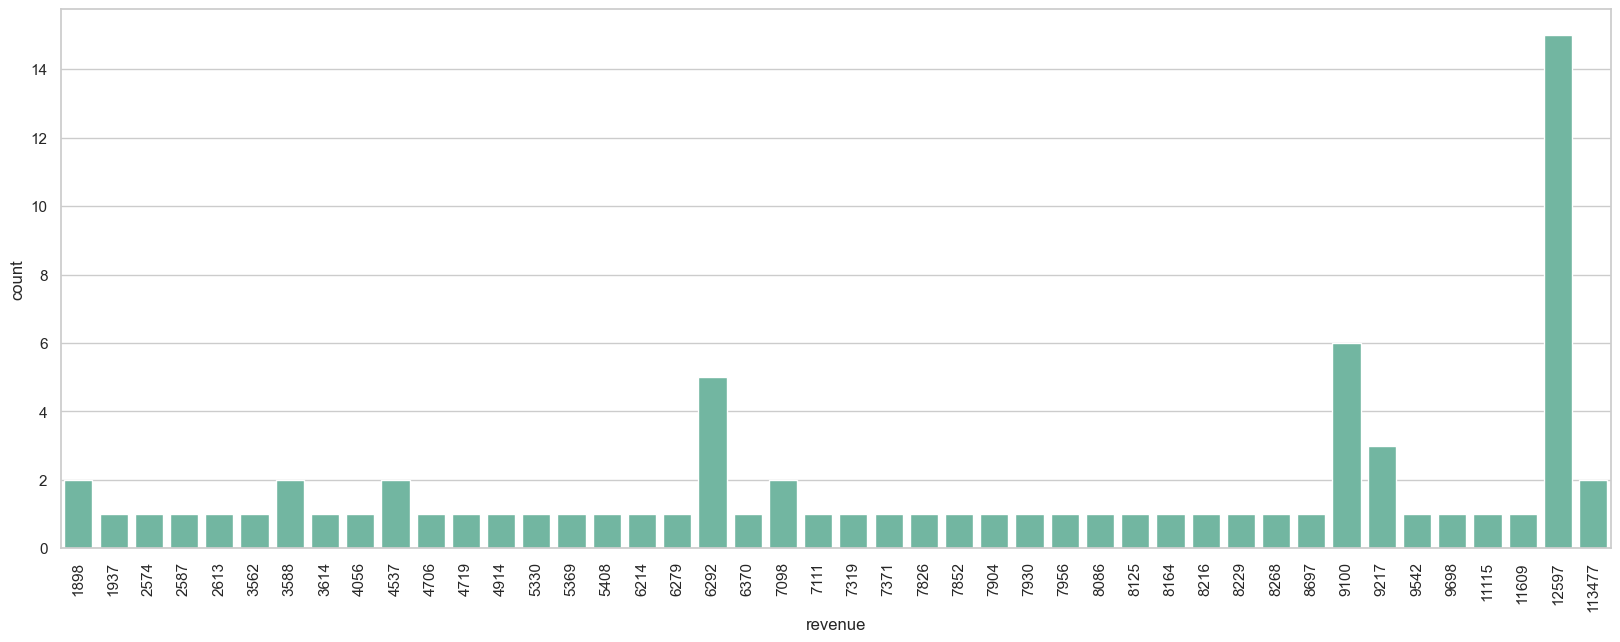

In [464]:
# Посмотрим на распределение пользователей из тестовой группы по тратам на премиум подписку
sns.countplot(data=tt.query('product_type == "premium_no_trial"'), x='revenue')
plt.xticks(rotation=90)
plt.show()

In [465]:
# Мода трат на подписку премиум в контрольной группе
tc2.query('product_type == "premium_no_trial"').revenue.mode()[0]

6292

In [466]:
# Мода трат на подписку премиум в тестовой группе
tt.query('product_type == "premium_no_trial"').revenue.mode()[0]

12597

Для тестовых данных мы наблюдаем такую же картину, как и на этапе анализа контролей: даже если рассматривать пользователей одной страны, видно, что стоимость подписки варьируется, и эти цены не являются кратными, как это было бы в случае оплаты нескольких месяцев подписки. Причин этому может быть несколько: например, скидки за покупку подписки в пакете с другими услугами, использование промокодов, привязка цены к курсу валют и другие факторы. Скорее всего для пользователей из тестовой группы дефолтная цена за подписку была 12597, но многие пользователи покупали ее за 9100. Важно отметить, что из-за проблем с записью дат мы не можем точно определить, сколько месяцев пользователь действительно оплачивал подписку. Единственное, что можно сделать, — это, понять, для скольких из них имело смысл продлевать подписку на более длительный срок.

In [467]:
# Сколько человек в каждой группе заходили спустя месяц с момента регистрации
exploded_users.query('visit_days>30 & group!="control_1"').groupby(
    'group').uid.nunique()

group
control_2    26
test         27
Name: uid, dtype: int64

In [468]:
# Сколько премиум-подписчиков в каждой группе заходили спустя месяц с момента регистрации
exploded_users.query('(visit_days>30) & (buy_premium == 1)& (group != "control_1")').groupby(
    'group').uid.nunique()

group
control_2    2
test         2
Name: uid, dtype: int64

In [469]:
# Соберем uid этих людей на всякий случай
premium_more_then_moth = exploded_users.query(
    '(visit_days>30) & (buy_premium == 1) & (group != "control_1")').uid.unique()
premium_more_then_moth

array([892390170, 892405179, 892354854, 892435536])

Только двум премиум-подписчикам в каждой группе имело смысл продлевать подписку дольше одного месяца. Однако возможно, что некоторые пользователи случайно забыли её отключить. При предыдущем анализе CR мы выяснили, что был только один пользователь, у которого произошло два списания за покупку премиум-подписки, и его ID был 891297711, и он не использовал приложение более месяца. Таким образом, либо кто-то платил за подписку дольше месяца и оплата происходила одним списанием, либо, скорее всего, никто не оформлял подписку дольше чем на месяц. Учитывая, что суммы, заплаченные за подписку, сильно различаются, имеет смысл проверить гипотезу о том, что сумма, уплаченная за премиум-подписку, не различалась между тестовой и контрольной группами. Поскольку подавляющее большинство пользователей совершили только одну покупку подписки, считаем, что взаимосвязь между отдельными транзакциями отсутствует. Давайте ещё раз посмотрим на распределение затрат на премиум.

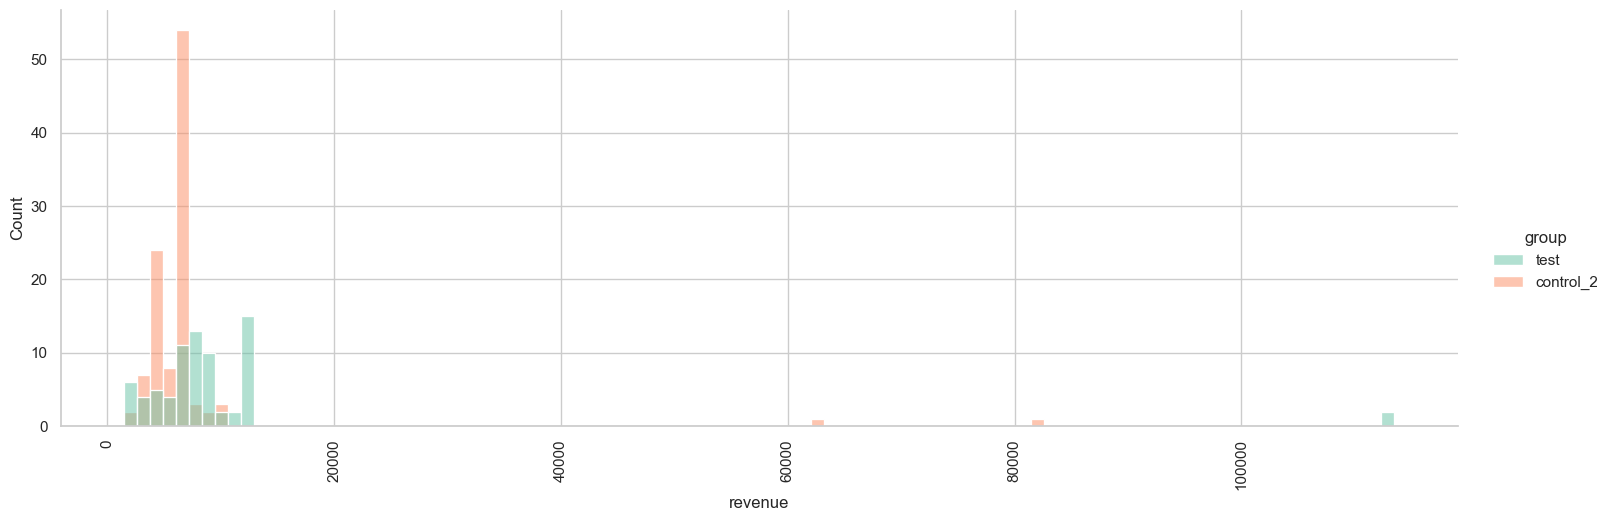

In [470]:
# Посмотрим на распределение пользователей по тратам на премиум подписку
sns.displot(
    data=transactions.query(
        'product_type == "premium_no_trial" & group != "control_1"'),
    x="revenue",
    hue="group",
    height=5,
    aspect=3,
)
plt.xticks(rotation=90)
plt.show()

Видим, что распределение данных не является нормальным, более того, в каждой группе есть по нескольку выбросов - пользователей, которые потратили на подписку в несколько раз больше, чем остальные. Однако еще на этапе анализа двух контрольных групп мы решили, что не будем удалять этих пользователей из выборки, поскольку они скорее всего являются нашими топовыми подписчиками.

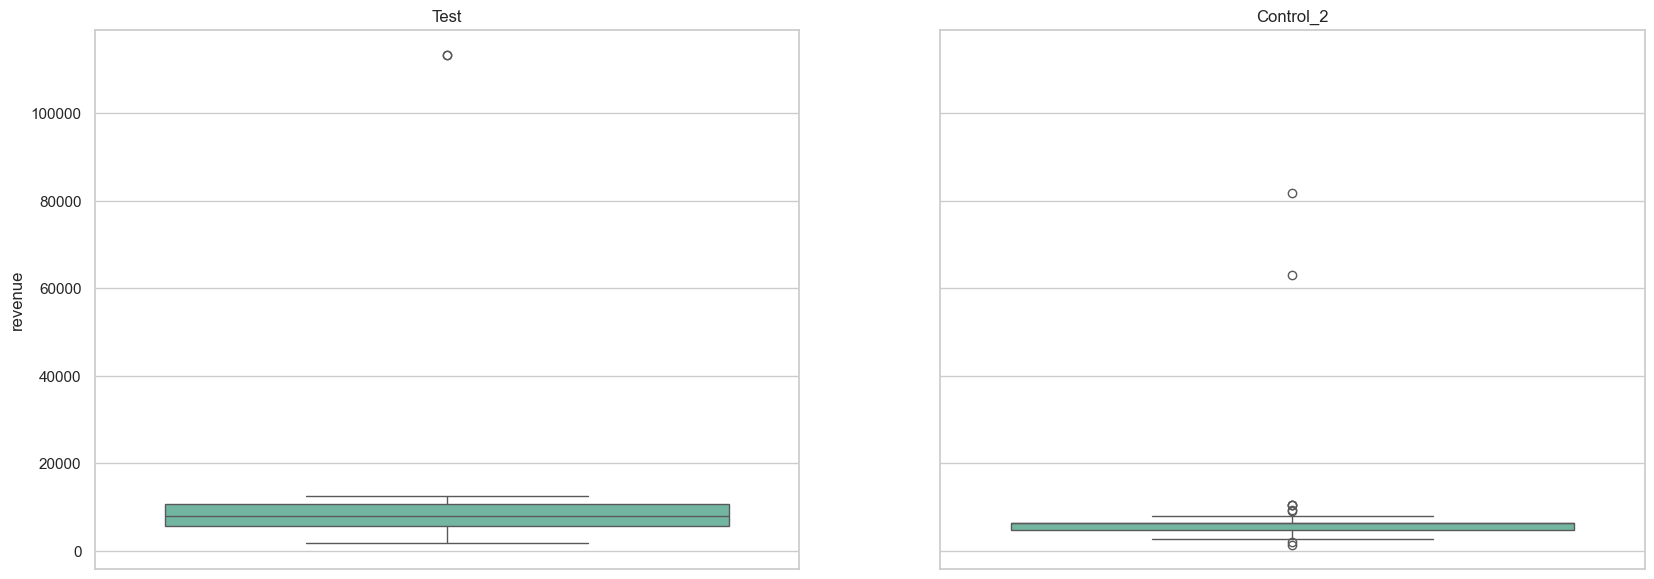

In [471]:
# Отобразим траты на премиум подписку в каждой группе в виде боксплотов
fig, axes = plt.subplots(1, 2, sharey=True)
sns.boxplot(
    ax=axes[0], data=tt.query('product_type == "premium_no_trial"'), y="revenue"
)
sns.boxplot(
    ax=axes[1], data=tc2.query('product_type == "premium_no_trial"'), y="revenue"
)
axes[0].set_title("Test")
axes[1].set_title("Control_2")
plt.show()

Руководствуясь тем, в каждой группе у нас больше 100 человек, для сравнения AOV за премиум подписку используем т-тест. Проверяем нулевую гипотезу о том, что средние траты на премиум в контрольной и тестовой группах не различаются.

In [472]:
# Рассчитываем критерий Колмогорова-Смирнова
# Нулевая гипотеза - распредление данных соответствует нормальному
stats.kstest(tt.query('product_type == "premium_no_trial"').revenue, 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1898, statistic_sign=-1)

In [473]:
# Рассчитываем критерий Колмогорова-Смирнова
# Нулевая гипотеза - распредление данных соответствует нормальному
stats.kstest(tc2.query('product_type == "premium_no_trial"').revenue, 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1482, statistic_sign=-1)

In [474]:
# Проверяем равентво дисперсий с помощью критерия Левена
# Нулевая гипотеза - дисперсии равны
stats.levene(tt.query('product_type == "premium_no_trial"').revenue,
             tc2.query('product_type == "premium_no_trial"').revenue)

LeveneResult(statistic=2.553714045508824, pvalue=0.11181896308480163)

In [475]:
# Средний чек в контрольной группе
tc2.query('product_type == "premium_no_trial"').revenue.mean().round(2)

7009.85

In [476]:
# 95% доверительный интервал для AOV в контроле_2
stats.t.interval(0.95, df=len(tc2.query('product_type == "premium_no_trial"').revenue.values)-1,
                 loc=np.mean(
                     tc2.query('product_type == "premium_no_trial"').revenue.values),
                 scale=stats.sem(tc2.query('product_type == "premium_no_trial"').revenue.values))

(5195.402182792783, 8824.293055302456)

In [477]:
# Средний чек в тестовой группе
tt.query('product_type == "premium_no_trial"').revenue.mean().round(2)

10745.03

In [478]:
# 95% доверительный интервал для AOV в тесте
stats.t.interval(0.95, df=len(tt.query('product_type == "premium_no_trial"').revenue.values)-1,
                 loc=np.mean(
                     tt.query('product_type == "premium_no_trial"').revenue.values),
                 scale=stats.sem(tt.query('product_type == "premium_no_trial"').revenue.values))

(6682.510037667335, 14807.544016386717)

In [479]:
# Рассчитываем т-критерий
stats.ttest_ind(tt.query('product_type == "premium_no_trial"').revenue,
                tc2.query('product_type == "premium_no_trial"').revenue)

TtestResult(statistic=1.8421397328928197, pvalue=0.06712783371248311, df=177.0)

Уровень значимости получился выше 0.05, значит мы не можем отвергнуть нулевую гипотезу о равенстве средних.

## AOV для премиум подписки: вывод

Как это ни парадоксально, несмотря на то, что в контрольной и тестовой группах моды распределений трат на покупку премиум подписки различаются в два раза, и несмотря на увеличение стоимости подписки в тестовой группе, на основе t-теста мы не можем сделать вывод о том, что средний чек за премиум в тестовой группе достоверно выше, чем в контрольной. Вероятно, это связано с тем, что, как видно из боксплота и графика распределения, в тестовой группе распределение трат на премиум подписку более пологое и широкое по сравнению с контрольной.

Что можно сделать, если возникают сомнения? Если есть время и доступ к вычислительным ресурсам (в нашем случае мы исходили из предположения, что их нет), было бы лучше использовать бутстрап вместо t-теста, поскольку этот метод не требует предположений о нормальности распределений, но требует больше вычислительной мощности. Также можно рассмотреть перестановочный тест как альтернативу, но он тоже ресурсоемкий. Руководство по проведению этих тестов можно найти в приложении. Другой вариант — сосредоточиться на других метриках, не связанных со средним чеком, которые не зависят от вычисления СРЕДНЕГО значения.

## ARPU

ARPU = суммарный доход / количество пользователей. Тоесть это просто среднее значение из total_revenue в таблицах users

Оценим ARPU за весь период наблюдений, поскольку у какая-то проблема с записью дат и расчет по-месячно может быть некорректный

In [480]:
ut.total_revenue.describe()

count      4271.000000
mean        543.915008
std        4428.693656
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      129870.000000
Name: total_revenue, dtype: float64

In [481]:
uc1.total_revenue.describe()

count      4318.000000
mean        577.581751
std        6852.306524
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      403104.000000
Name: total_revenue, dtype: float64

Как мы выяснили ранее, бОльшая часть наших пользователей не совершает никаких покупок, поэтому нельзя ожидать, что распределение дохода от пользователей будет соответствовать нормальному. Однако, учитывая что у нас внушительные выборки - около 4000 человек, то мы ожидаем, что в соответствии с ЦПТ распределение выборочных средних будет соответствовать нормальному, и поэтому для сравнения ARPU будем использовать т-тест

In [482]:
# Проверим, равны ли дисперсии дохода от пользователей для контроля и теста
stats.levene(uc1.total_revenue, ut.total_revenue)

LeveneResult(statistic=0.0729566319475365, pvalue=0.7870860790899399)

Уровень значимости выше 0.05, значит принимаем нулевую гипотезу теста Левена о том, что выборочные дисперсии не различаются

In [483]:
# ARPU в контрольной группе
uc2.total_revenue.mean().round(2)

444.33

In [484]:
# 95% доверительный интервал для ARPU в контроле_2
stats.t.interval(0.95, df=len(uc2.total_revenue.values)-1,
                 loc=np.mean(uc2.total_revenue.values),
                 scale=stats.sem(uc2.total_revenue.values))

(358.6552662359906, 530.0011754818008)

In [485]:
# ARPU в тестовой группе
ut.total_revenue.mean().round(2)

543.92

In [486]:
# 95% доверительный интервал для ARPU в тестовой группе
stats.t.interval(0.95, df=len(ut.total_revenue.values)-1,
                 loc=np.mean(ut.total_revenue.values),
                 scale=stats.sem(ut.total_revenue.values))

(411.05873479154764, 676.7712815980566)

Проведем т-тест. Нулевая гипотеза - средняя выручка с пользователя, то есть ARPU, в двух группах не различается

In [487]:
stats.ttest_ind(uc1.total_revenue, ut.total_revenue)

TtestResult(statistic=0.27010485361713976, pvalue=0.7870860790916312, df=8587.0)

Уровень значимости выше 0.05, значит мы приниимаем нулевую гипотезу о том, ARPU в тесте и контроле не различаются

Вывод: если считать ARPU за весь период наблюдений, то разницы между группами нет - то есть в конечном итоге для бизнеса эксперимент ничего не дал. В показатель ARPU, который мы рассчитали, входят все покупки, а не только покупки премиум подписки, но как раз на уровне суммарного эффекта увеличение стоимости премиум подписки ничего не дало.

Посмотрим структуру доходов: какая часть доходов приходится на покупку премиум подписки в каждой группе

In [488]:
# Считаем прибыль от продаж каждого продукта в каждой группе
revenue = transactions.query('group != "control_1"').groupby(
    ['group', 'product_type'], as_index=False).revenue.sum()
# Считаем суммарную прибыль в каждой группе
revenue['revenue_sum'] = revenue.groupby(
    'group', as_index=True).revenue.transform('sum')
# Находим долю прибыли от каждого типа продукта
revenue['revenue_rate'] = (
    revenue.revenue / revenue.revenue_sum * 100).round(2)

In [489]:
revenue

,group,product_type,revenue,revenue_sum,revenue_rate
0,control_2,coins,384709,1878344,20.48
1,control_2,other_type,126386,1878344,6.73
2,control_2,premium_no_trial,736034,1878344,39.19
3,control_2,trial_premium,631215,1878344,33.60
4,test,coins,558259,2313844,24.13
5,test,other_type,160251,2313844,6.93
6,test,premium_no_trial,795132,2313844,34.36
7,test,trial_premium,800202,2313844,34.58


С помощью критерия хи-квадрат проверим, изменилась ли структура дохода после изменения стоимости премиум подписки. Нулевая гипотеза - не изменилась

In [490]:
# Создаем таблицу сопряженности
crosstab_revenue = revenue.pivot(
    index='group', columns='product_type', values='revenue_rate')
crosstab_revenue

product_type,coins,other_type,premium_no_trial,trial_premium
group,,,,
control_2,20.48,6.73,39.19,33.60
test,24.13,6.93,34.36,34.58


In [491]:
# Считаем хи-квадрат
chi_revenue = stats.chi2_contingency(crosstab_revenue)
print(
    f"Статистика критерия равна {chi_revenue[0].round(4)}, уровень значимости {chi_revenue[1].round(4)}"
)
if chi_revenue[1] < 0.05:
    print(
        "Уровень значимости меньше 0.05, стуктура прибыли в контроле и тесте РАЗНАЯ"
    )
else:
    print(
        "Уровень значимости больше 0.05, стуктура прибыли в контроле и тесте ОДИНАКОВАЯ"
    )

Статистика критерия равна 0.6328, уровень значимости 0.8889
Уровень значимости больше 0.05, стуктура прибыли в контроле и тесте ОДИНАКОВАЯ


Структура прибыли в тестовой и контрольной группах одинаковая, что свидетельствует о том, что в тестовой группе ARPU осталась прежней не из-за перераспределения доходов между продуктами, а за счет того, что доходы от премиум-подписки остались на прежнем уровне. Вероятно, разнонаправленные изменения CR и среднего чека взаимно компенсировали друг друга.

## ARPU: вывод

1. Изменение цены премиум подписки не привело к достоверным изменениям ARPU, рассчитанном за весть период наблюдений
2. Структура прибыли в контрольных и тестовой группах не различается, доля прибыли, приходящаяся на покупку премиум подписки одинакова. Это говорит о том, что при изменении цены за подписку, доходы ее покупки остались на прежнем уровне, вероятно, разнонаправленные изменения CR и среднего чека взаимно компенсировали друг друга.

## Retention rate

Retention rate показывает отношение клиентов, которые вернулись в приложение на n-ый день, к числу клиентов на начало расчетного периода. Мы будем считать началом рассчетного периода момент регистрации. Рассчитаем retention на 7, 14, 30 и 60 дни.

Для рассчета этой метрики и оценки достоверности различий (с помощью критерия хи-квадрат) воспользуемся функцией check_retention_difference(data, days, groups), которую мы подробно описали на втором этапе при анализе контролей (ячейка 186)

In [492]:
data = exploded_users
days = [7, 14, 30, 60]
groups = ['test', 'control_2']
check_retention_difference(data=data, days=days, groups=groups)

,day,retention_rate_test,retention_rate_control_2,chi2_statistic,p_value,different
0,7,24.63,23.76,0.831052,0.361968,False
1,14,11.24,11.18,0.001996,0.964368,False
2,30,1.01,1.09,0.062450,0.802665,False
3,60,0.63,0.61,0.000000,1.000000,False


В каждый из целевых дней (7, 14, 30, 60) retention rate в контрольной и тестовой группах не различались, поэтому делаем вывод, что изменение цены подписки не привело к изменению retension 7, 14, 30 и 60 дни.

Посмотрим, может ли количество дней в приложении как-то повлиять на траты пользователя

In [493]:
# подготовим датафрейм, в котором для каждого пользователя будет сколько дней он провел в приложении и суммарные траты
df = exploded_users.groupby("uid", as_index=False).agg(
    days_in_app=("visit_days", "max"), total_revenue=("total_revenue", "max")
)
# Сколько пользователей потратили больше 100000
df.query('total_revenue>=100000').uid.count()

3

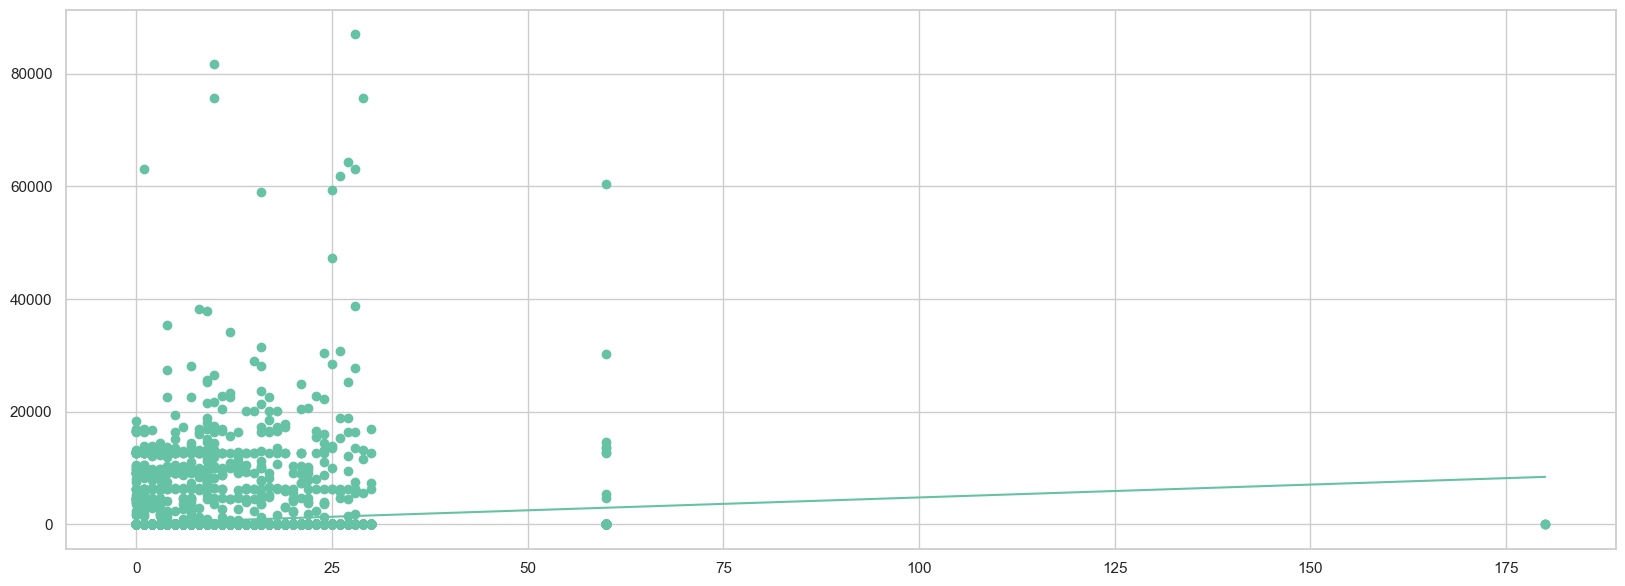

In [494]:
# Отфильтруем выбросы
x = df.query('total_revenue<100000').days_in_app
y = df.query('total_revenue<100000').total_revenue
# Строим диаграмму рассеяния
plt.scatter(x, y)
# Строим линию тренда
z = np.polyfit(x, y, deg=1)
p = np.poly1d(z)
# Рисуем линию тренда
plt.plot(x, p(x))
plt.show()

In [495]:
# Рассчитаем коэффициент корреляции между количеством днней в приложении и суммарными тратами пользователя
pg.corr(
    df.query("total_revenue<100000").days_in_app,
    df.query("total_revenue<100000").total_revenue,
    alternative="two-sided",
    method="pearson",
)

,n,r,CI95%,p-val,BF10,power
pearson,12824,0.125969,"[0.11, 0.14]",1.621764e-46,3.739e+42,1.0


Видим, что коэффициент корреляции между количеством дней в приложении и суммарными тратами пользователя хоть и маленький, но значимый, значит как минимум мы можем предположить, что при увеличении лояльности пользователей APPPU (и, возможно, ARPU) вырастет

## Retention: вывод

1. Изменение цены подписки не привело к изменению retension 7, 14, 30 и 60 дни. Эти показатели не различаются в тестовой и контрольной группах
2. Исходя из данных, представленных здесь https://app.tracker.my.com/downloads/mytracker-retention-and-conversion-rates-in-different-app-categories-ru.pdfm https://www.lennysnewsletter.com/p/what-is-good-retention-issue-29 и здесь https://www.geckoboard.com/best-practice/kpi-examples/retention-rate/ у приложения достаточно низкие показатели retention. Больше всего настораживают retention 30 и 60 дня, которые отражают долгосрочный retention продукта. За это время люди, как правило, успевают оценить продукт и принять решение о том, продолжать ли им пользоваться или нет. И мы видим, что пользоваться продуктом пользователи не хотят.

# 4. Общие выводы и рекомендации:

1. Увеличение стоимости премиум-подписки не привело к изменению ARPU, что свидетельствует об отсутствии экономического эффекта от проведенного эксперимента, и в целом его можно считать неудачным.
2. В расчете ARPU учитывалась прибыль от всех продуктов, при этом было установлено, что изменение цены премиум подписки не повлияло на долю прибыли, получаемую от ее продажи. Это связано с тем, что повышение цены премиум-подписки привело к достоверному снижению конверсии в платную подписку — с 2,38% до 1,55%. В то же время прослеживается некоторая тенденция к увеличению среднего чека за премиум-подписку, не смотря на то, что на основании т-теста мы не можем утверждать, что это показатель достоверно различается в контрольной и тестовой группах. В итоге, снижение CR по-видимому компенсировало эффект от увеличения среднего чека.
3. Retention Rate на 30-й день низкий, около 1%, и повышение стоимости подписки не оказало влияния на этот показатель. Судя по имеющимся данным, большинство пользователей оформляют подписку только на 1 месяц. Поскольку количество дней, проведенных в приложении, положительно коррелирует с общими тратами пользователей, рекомендуется работать над повышением лояльности пользователей. В случае увеличения срока подписки более чем на месяц, экономический эффект от повышения стоимости премиум-подписки может стать заметным.
4. Одной из возможных причин низкой лояльности пользователей может быть значительный дисбаланс между полами (примерно 20:1). Мужчины, зарегистрировавшись в приложении, не могут найти пару и покидают его в течение месяца. В этой связи рекомендуется привлечь больше женщин, например, предложив им бесплатную премиум-подписку. Учитывая, что на данный момент всего 5 женщин из 576 купили премиум, в целом на этой акции мы ничего не потеряем.
5. Было выявлено, что мужчины в возрасте от 24 до 43 лет готовы покупать подписку даже по повышенной цене. Возможно, этой аудитории стоит предложить пакетные предложения, чтобы увеличить их лояльность и повысить доходность.

# Приложения

Если бы мы хотели провести перестановочный тест для среднего чека, это можно было бы сделать с помощью следующей функции, которая:
1. Перемешивает объединенные данные для каждой итерации.
2. Делит их на две выборки и вычисляет разницу средних для каждой перестановки.
3. Считает, сколько раз разница на случайных перестановках была больше или равна наблюдаемой разнице.
4. Вычисляет p-значение как долю этих случаев от общего числа перестановок.

In [496]:
def permutation_test(data1, data2, num_permutations=10000):
    # Вычисляем наблюдаемую разницу средних
    observed_diff = np.mean(data1) - np.mean(data2)

    # Объединяем выборки
    combined = np.concatenate([data1, data2])

    count = 0
    for _ in range(num_permutations):
        # Перемешиваем данные
        permuted = np.random.permutation(combined)

        # Делим их на две выборки той же длины
        perm_sample1 = permuted[:len(data1)]
        perm_sample2 = permuted[len(data1):]

        # Вычисляем разницу для перемешанных выборок
        perm_diff = np.mean(perm_sample1) - np.mean(perm_sample2)

        # Считаем, сколько раз разница на перестановках превышает наблюдаемую
        if abs(perm_diff) > abs(observed_diff):
            count += 1

    # Возвращаем p-значение
    return count / num_permutations

In [497]:
permutation_test(tt.query('product_type == "premium_no_trial"').revenue,
                 tc2.query('product_type == "premium_no_trial"').revenue)

0.0473

Если бы мы хотели провести бутстрап для среднего чека, то это можно было бы сделать по следующему алгоритму 

In [498]:
# Создаем словарь, в котором ключ - название группы, а значение - соответстыующий датасет
dfs = {
    "test": tt.loc[(tt.product_type == "premium_no_trial")],
    "control": tc2.loc[(tc2.product_type == "premium_no_trial")]
}

# Создадим датафрейм, в котором будет итог по целевым метриками
AOV = pd.DataFrame({"AOV": [], "AOV_from": [], "AOV_to": []})

# Создаем словарь, где будем хранить распределения AOV по ключу - названию группы
AOV_distributions = {}

# Создаем словарь, где будут храниться доверительные интервалы
AOV_intervals = {}

for key, value in dfs.items():
    # Считаем  AOV по исходной выборке и записывам в табличку по ключу - названию группы
    AOV.loc[key, "AOV"] = int(value.revenue.mean() * 100)
    #  Генерируем 10000 выборок из исходной и считаем доверительный интервал для AOV бутстрапом
    b_AOV = pg.compute_bootci(
        value.revenue,
        confidence=0.95,
        decimals=4,
        func="mean",
        n_boot=10000,
        return_dist=True,
    )
    # записываем в табличку нижнюю границу доверительного интервала
    AOV.loc[key, "AOV_from"] = int(b_AOV[0][0] * 100)
    # записываем в табличку верхнюю границу доверительного интервала
    AOV.loc[key, "AOV_to"] = int(b_AOV[0][1] * 100)
    # Соxраняем распределение в словарь
    AOV_distributions[key] = b_AOV[1]
    # Сохраняем интервал в словарь
    AOV_intervals[key] = b_AOV[0]
# Выводим таблицу
AOV

,AOV,AOV_from,AOV_to
test,1074502.0,770232.0,1578622.0
control,700984.0,565183.0,927840.0


А для проверки того, пересекаются ли доверительные интревалы, использовать следующую функцию

In [499]:
# Функция для проверки пересечения двух интервалов
def check_overlap(interval1, interval2):
    return max(interval1[0], interval2[0]) <= min(interval1[1], interval2[1])

In [500]:
check_overlap(AOV_intervals['test'], AOV_intervals['control'])

True